## Analyze K-Means Cluster Results

In [41]:
import numpy as np
#in case we need to repeat experiment
#np.random.seed(255)

import pandas as pd
pd.options.display.max_rows = 22

import matplotlib.pyplot as plt
plt.style.use('classic')

import seaborn as sns
sns.set()

#sklearn imports
from sklearn.cluster import KMeans
import pickle # allows for model to be saved/load to file
from pandas.api.types import CategoricalDtype

file_kmean = 'kmean_dec_01.model'

file_final_train = 'final_train_dec_01.data'
file_final_test = 'final_test_dec_01.data'


In [ ]:
# this function converts the data frame to the appropriate data type
def convert_type(data):
    data = data.astype('category')
    data['C_MNTH'] = data['C_MNTH'].astype(CategoricalDtype(ordered=True))
    data['C_WDAY'] = data['C_WDAY'].astype(CategoricalDtype(ordered=True))
    data['C_HOUR'] = data['C_HOUR'].astype(CategoricalDtype(ordered=True))
    data['C_VEHS'] = data['C_VEHS'].astype(CategoricalDtype(ordered=True))
    data['P_AGE'] = data['P_AGE'].astype(CategoricalDtype(ordered=True))
    data['P_PSN'] = data['P_PSN'].astype(CategoricalDtype(ordered=True))
    data['P_ISEV'] = data['P_ISEV'].astype('int')
    return data

In [42]:
loaded_model = pickle.load(open(file_kmean, "rb"))

d_train = pd.read_csv(file_final_train, engine = 'python')
print(d_train.head(2))


d_train = d_train.astype('category')
d_train['C_YEAR'] = d_train['C_YEAR'].astype(CategoricalDtype(ordered=True))
d_train['C_MNTH'] = d_train['C_MNTH'].astype(CategoricalDtype(ordered=True))
d_train['C_WDAY'] = d_train['C_WDAY'].astype(CategoricalDtype(ordered=True))
d_train['C_HOUR'] = d_train['C_HOUR'].astype(CategoricalDtype(ordered=True))
d_train['V_YEAR'] = d_train['V_YEAR'].astype(CategoricalDtype(ordered=True))
d_train['P_AGE'] = d_train['P_AGE'].astype('int')
#print(df.dtypes)
print(d_train.info())

#Split between data and class
Y_train = d_train[d_train.columns[-1]]
X_train = d_train[d_train.columns[0:d_train.columns.size -1]]

d_test = pd.read_csv(file_final_test, engine = 'python')
print(d_test.head(2))

#Split between data and class
Y_test = d_test[d_test.columns[-1]]
X_test = d_test[d_test.columns[0:d_test.columns.size -1]]




   C_YEAR  C_MNTH  C_WDAY  C_HOUR  C_VEHS  C_CONF  C_RCFG  C_WTHR  C_RSUR  \
0      10      12       6       3       2      41       2       1       3   
1       4       9       1       4       1       2       2       2       1   

   C_RALN  C_TRAF  V_YEAR  P_SEX  P_AGE  P_PSN  P_USER  P_ISEV  
0       1       7       2      1     53      1       1       1  
1       1       2       2      1     16      1       1       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450000 entries, 0 to 2449999
Data columns (total 17 columns):
C_YEAR    category
C_MNTH    category
C_WDAY    category
C_HOUR    category
C_VEHS    category
C_CONF    category
C_RCFG    category
C_WTHR    category
C_RSUR    category
C_RALN    category
C_TRAF    category
V_YEAR    category
P_SEX     category
P_AGE     int32
P_PSN     category
P_USER    category
P_ISEV    category
dtypes: category(16), int32(1)
memory usage: 46.7 MB
None
   C_YEAR  C_MNTH  C_WDAY  C_HOUR  C_VEHS  C_CONF  C_RCFG  C_WTHR  C_RSUR  \
0    

In [43]:
print(loaded_model.cluster_centers_)
print(loaded_model.labels_)

[[ 8.66751478  6.68739246  4.03650466  2.42044226  2.27546982 27.93403977
   1.76798302  1.54313846  1.44079259  1.26559092  4.07774867  2.48000545
   0.52611301 23.8802949   1.20347564  1.42352047]
 [ 8.70712841  6.76724123  4.29641015  2.10129918  1.10626798  4.38136129
   1.33144534  1.82093507  1.83243397  1.71718567  6.20523377  2.44460526
   0.58232143 26.51739936  1.1751275   1.41486082]
 [ 9.37436527  6.72695459  3.91118374  2.30053993  2.15904633 25.32280226
   1.73354166  1.54218583  1.45624536  1.29708941  4.18853432  2.58349946
   0.53609793 55.96111515  1.05227184  1.24917169]]
[2 1 0 ... 0 1 2]


In [44]:
loaded_model.n_clusters

3

In [45]:
cluster1 = d_train[loaded_model.labels_ == 0]

In [46]:
cluster2 = d_train[loaded_model.labels_ == 1]

In [47]:
cluster3 = d_train[loaded_model.labels_ == 2]

In [48]:
print("cluster1 Shape {}".format(cluster1.shape))
print("cluster2 Shape {}".format(cluster2.shape))
print("cluster3 Shape {}".format(cluster3.shape))

cluster1 Shape (1159442, 17)
cluster2 Shape (351083, 17)
cluster3 Shape (939475, 17)


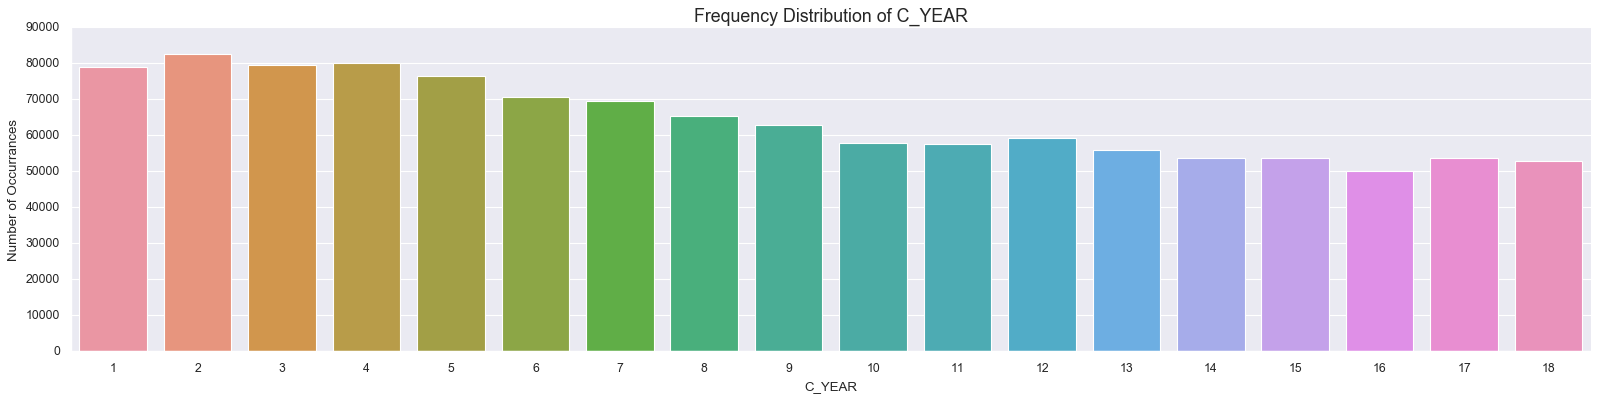

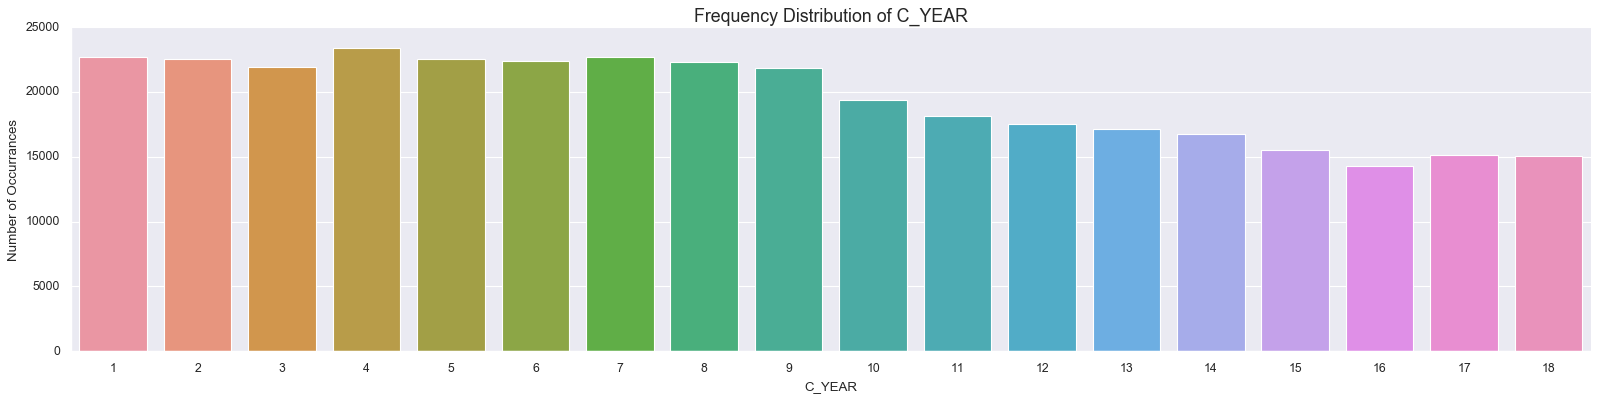

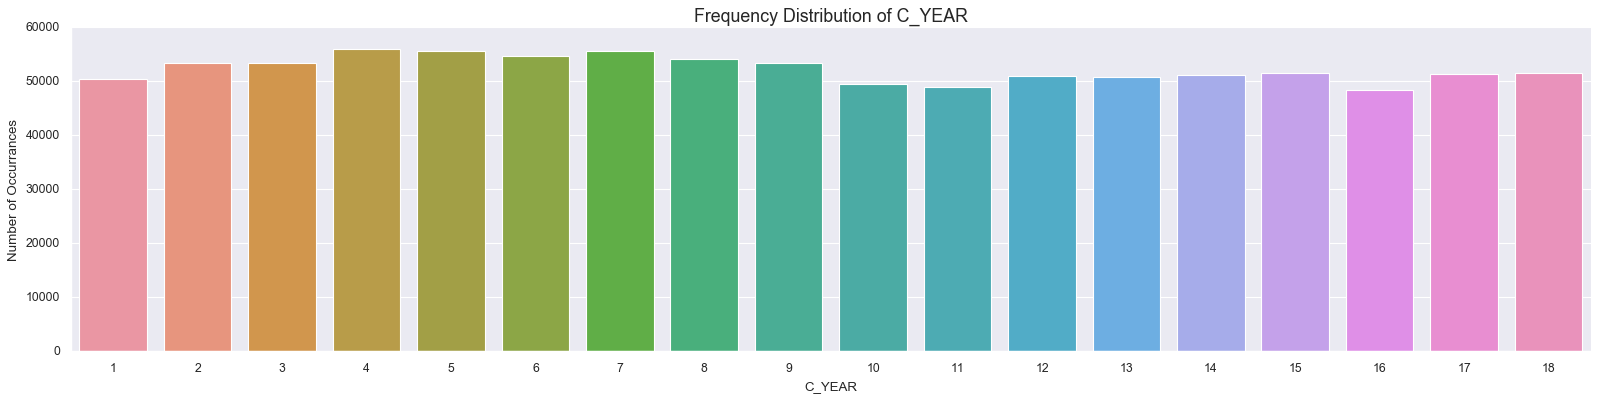

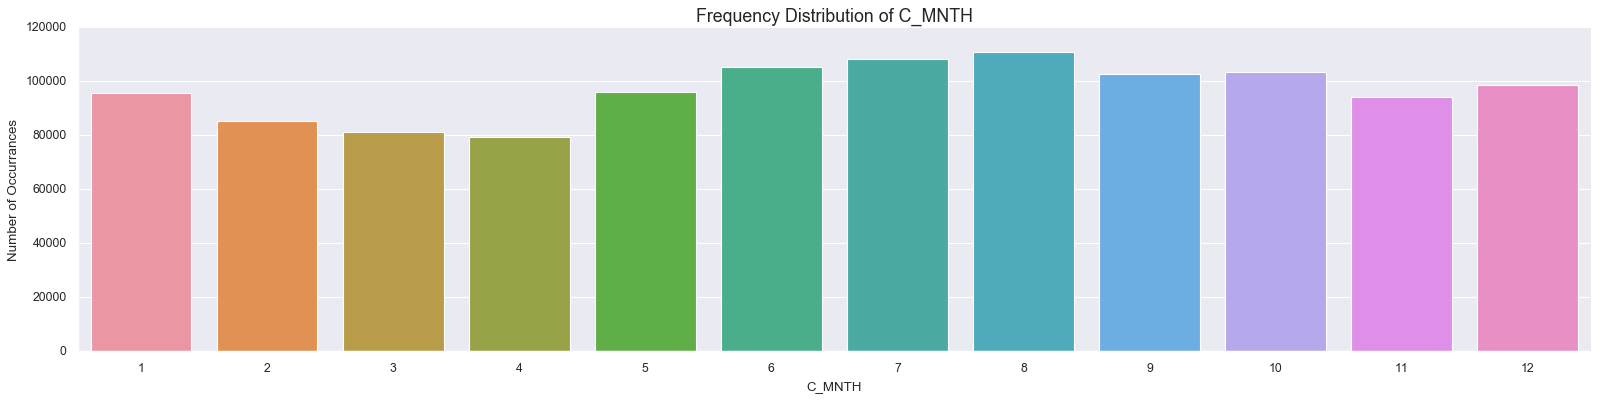

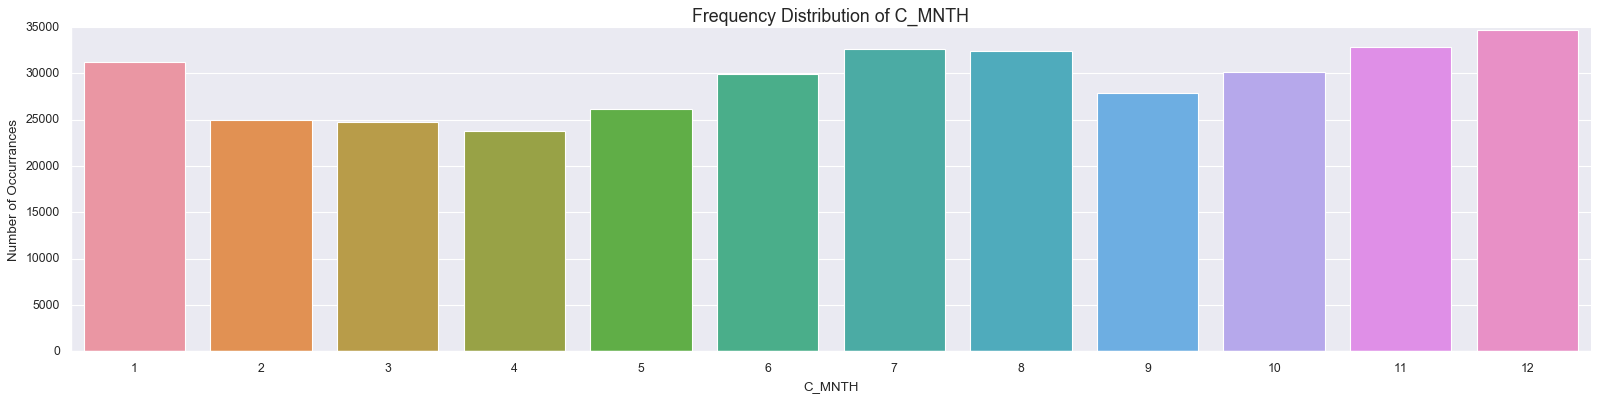

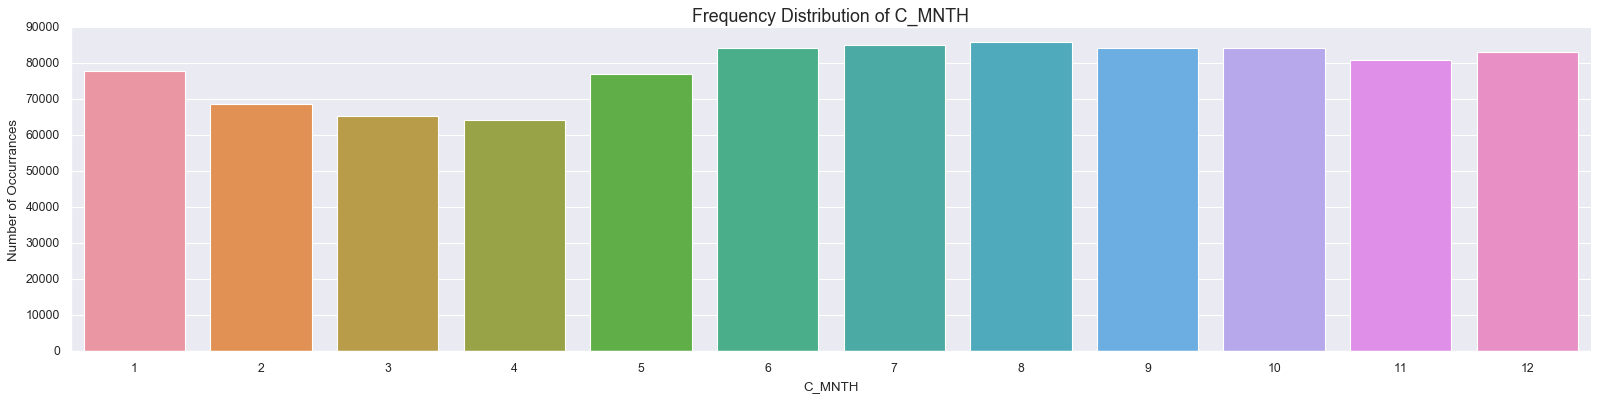

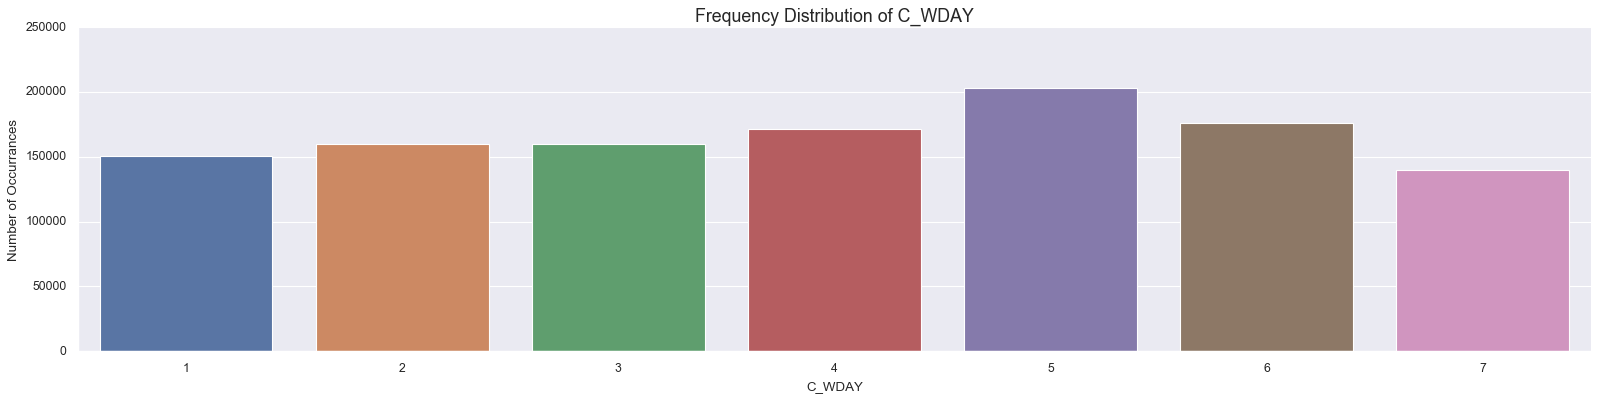

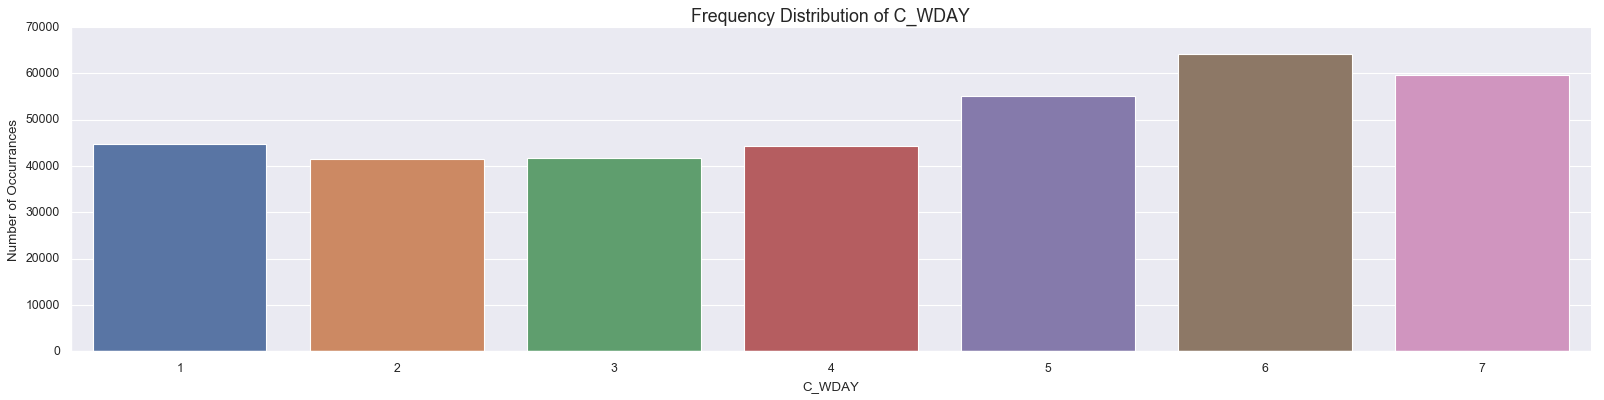

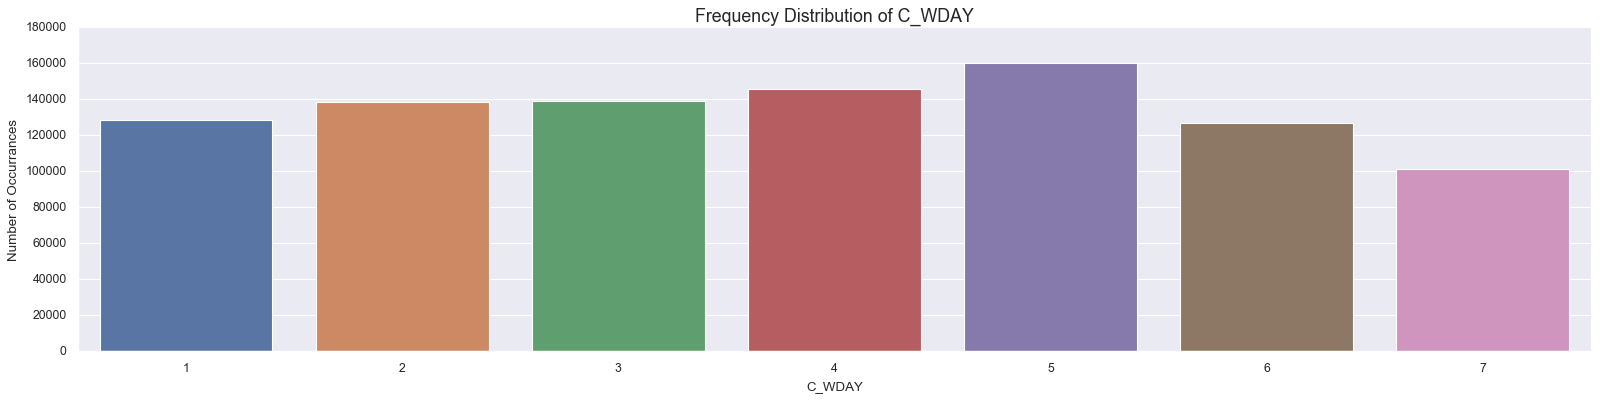

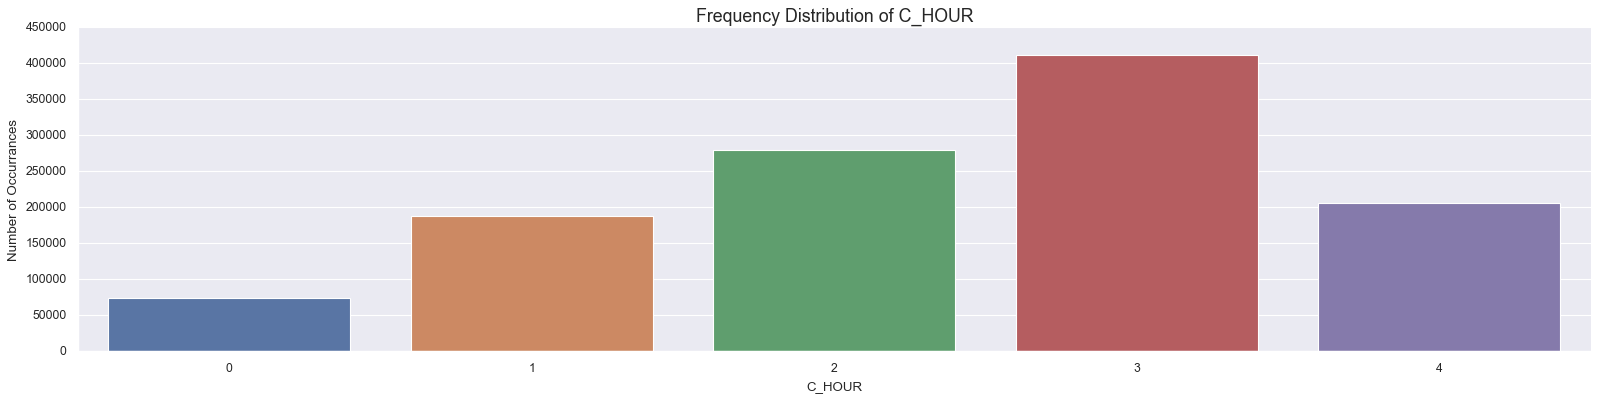

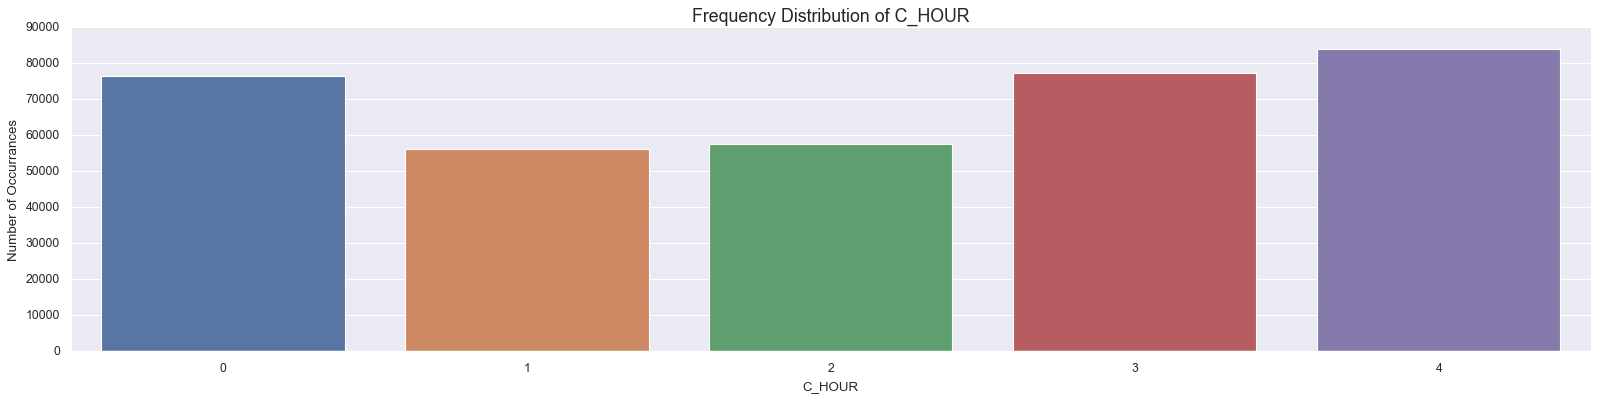

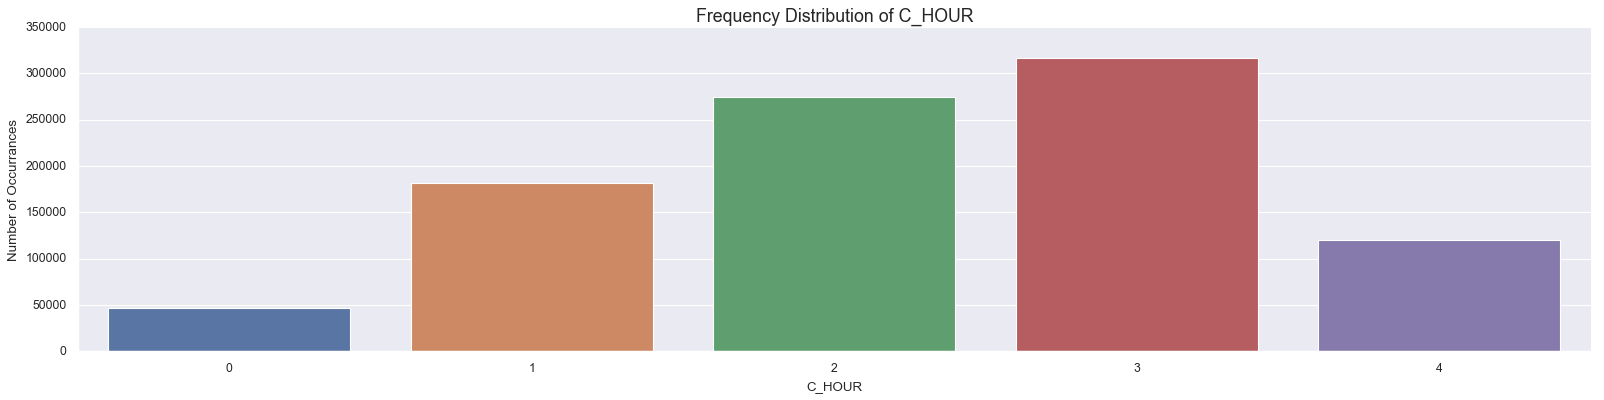

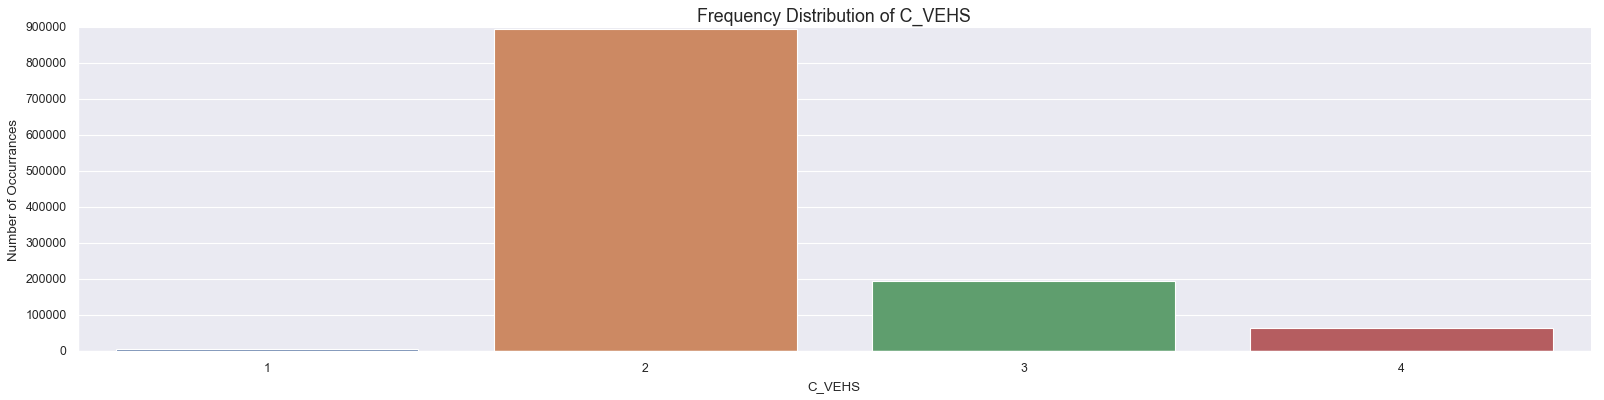

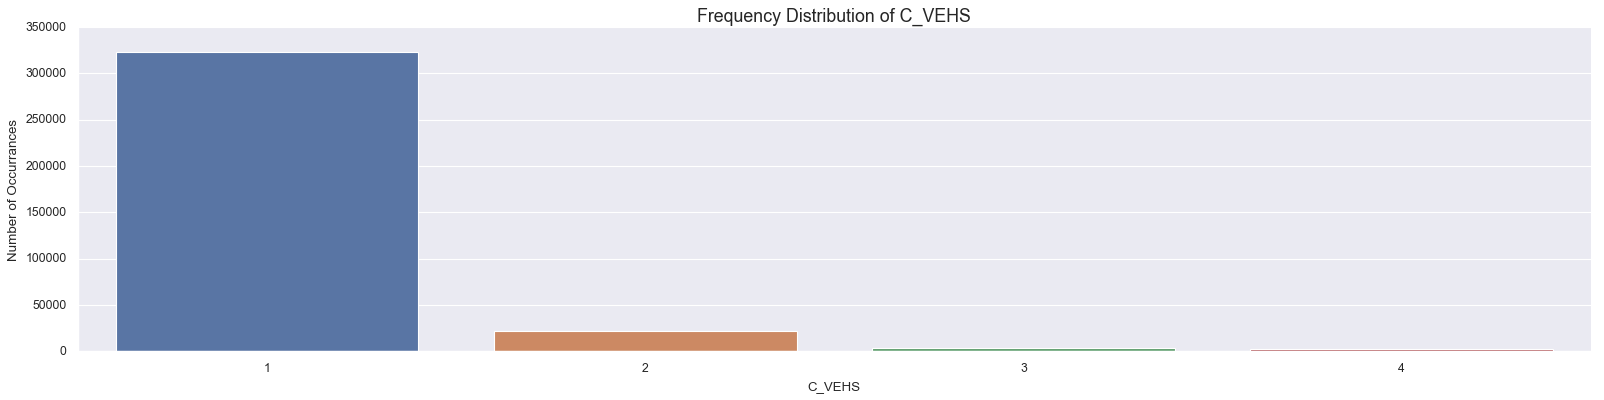

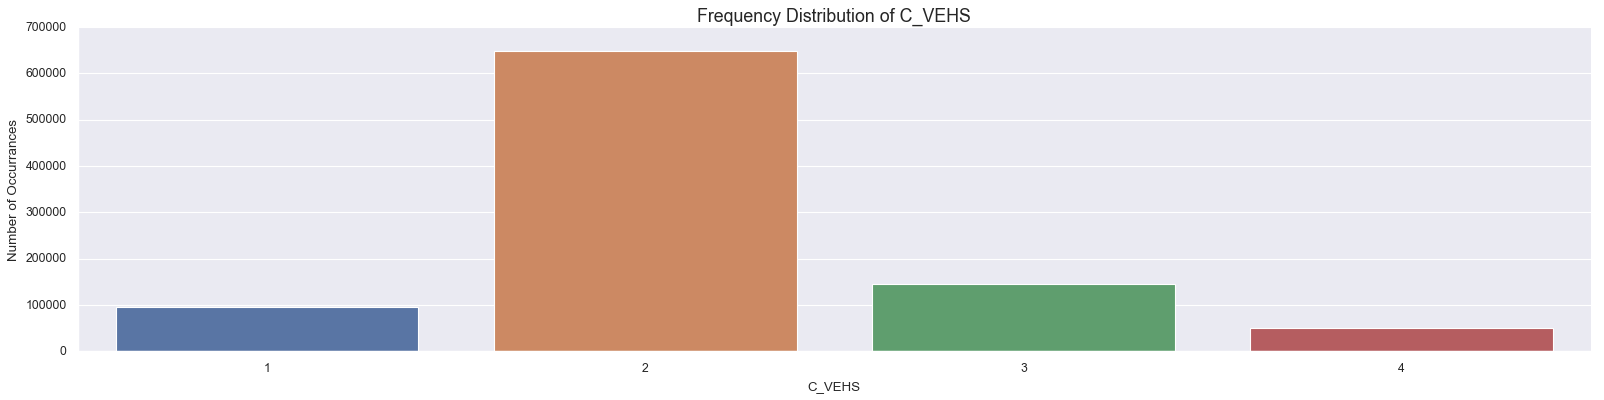

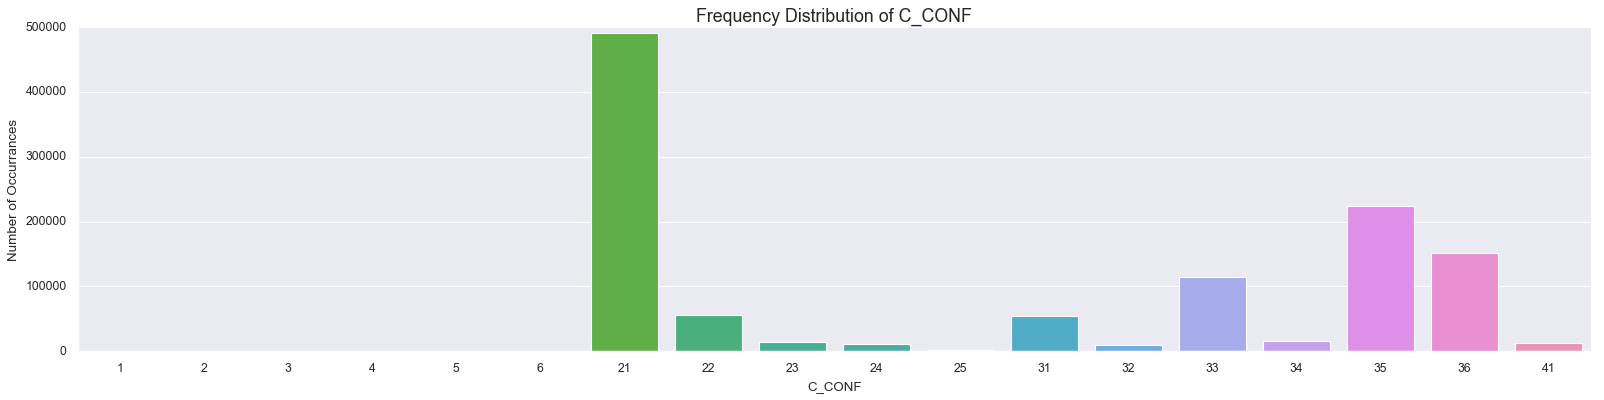

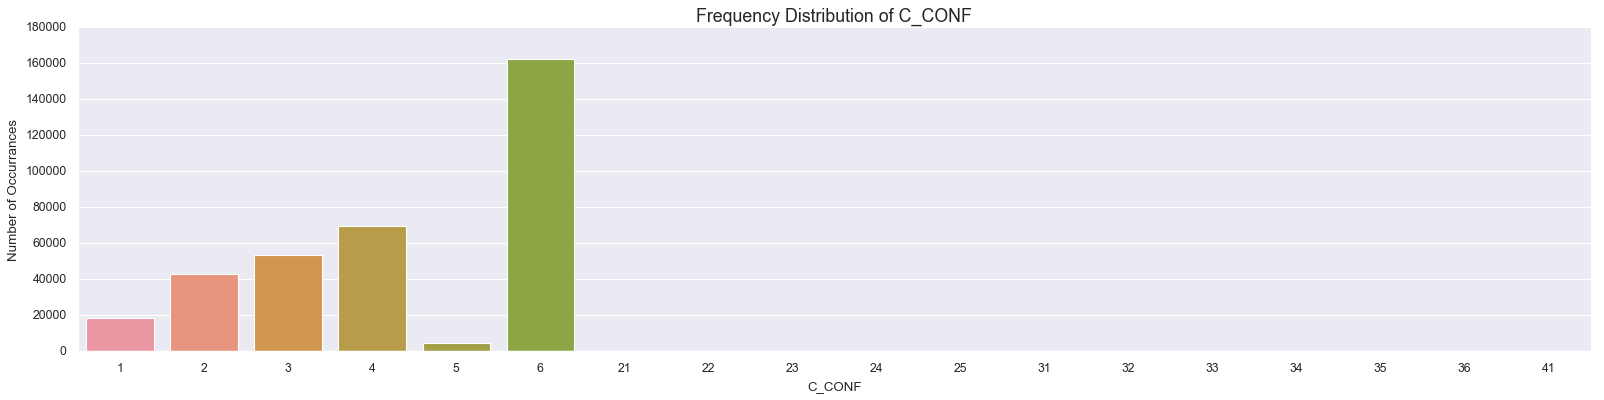

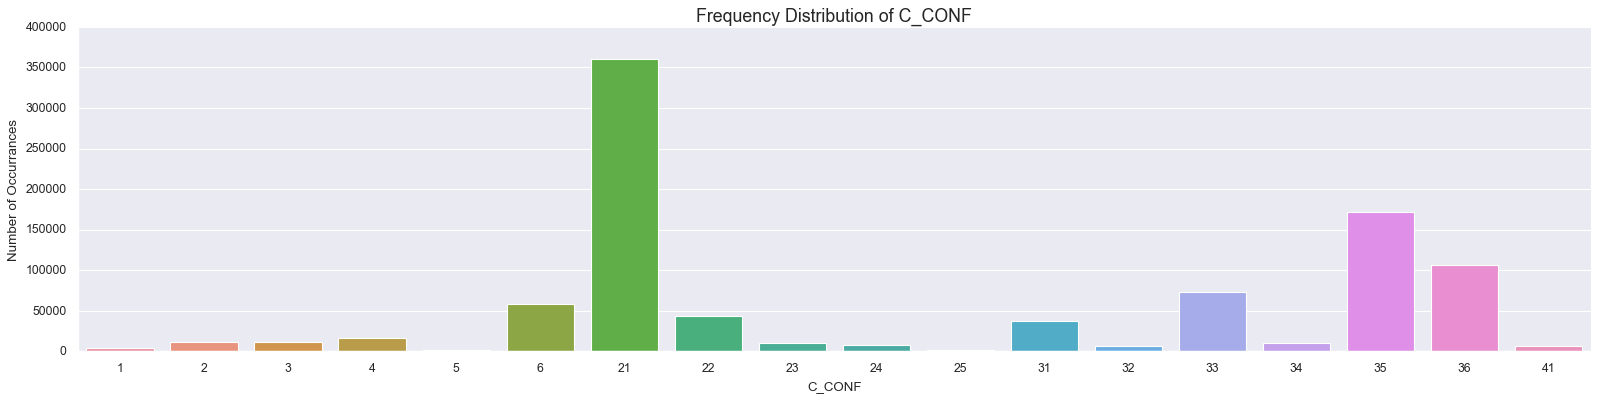

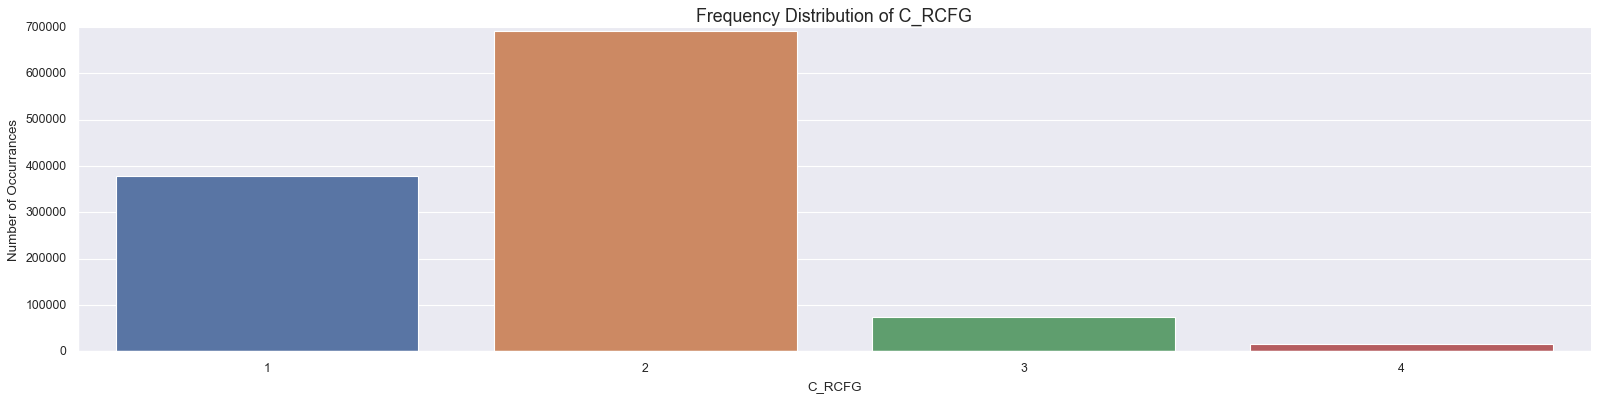

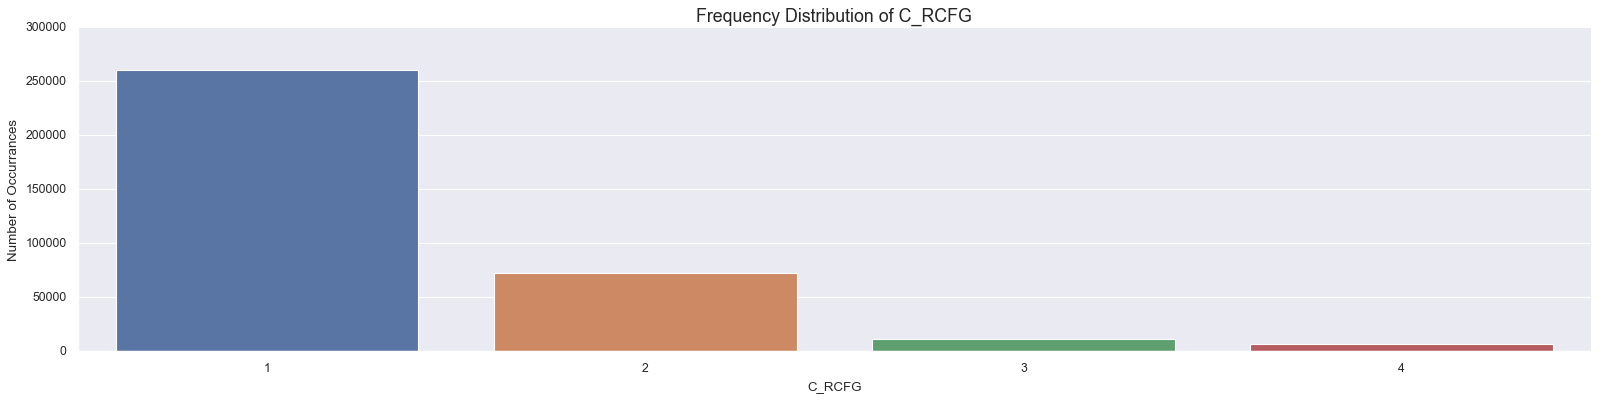

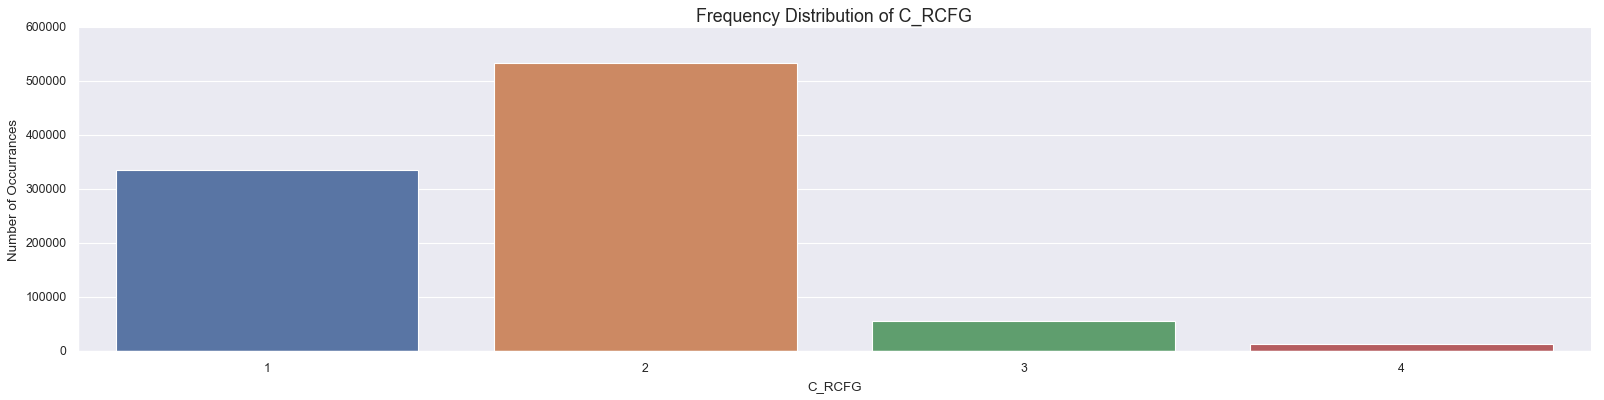

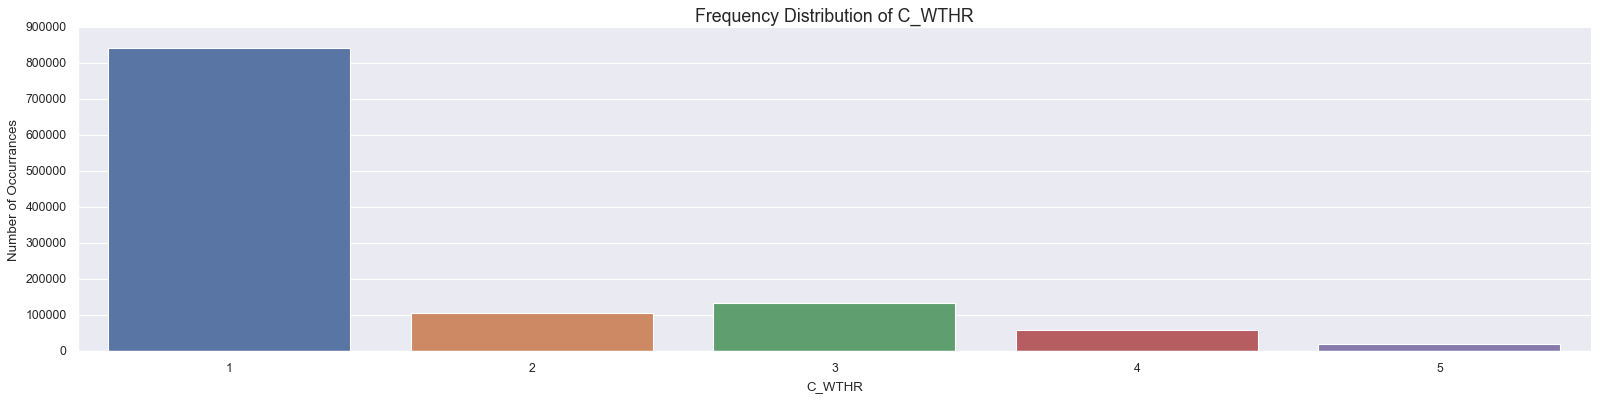

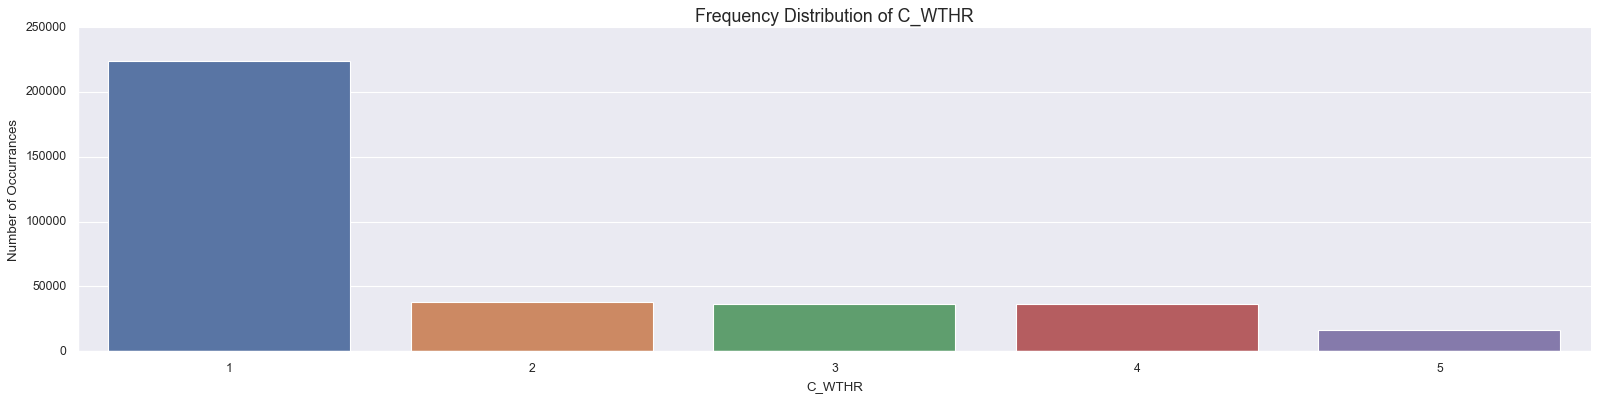

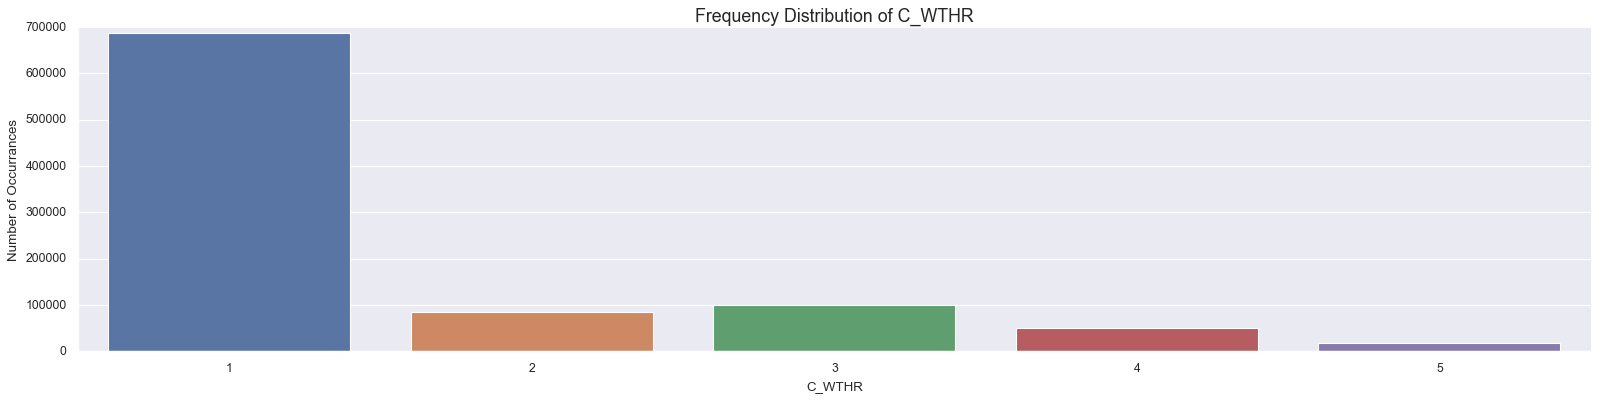

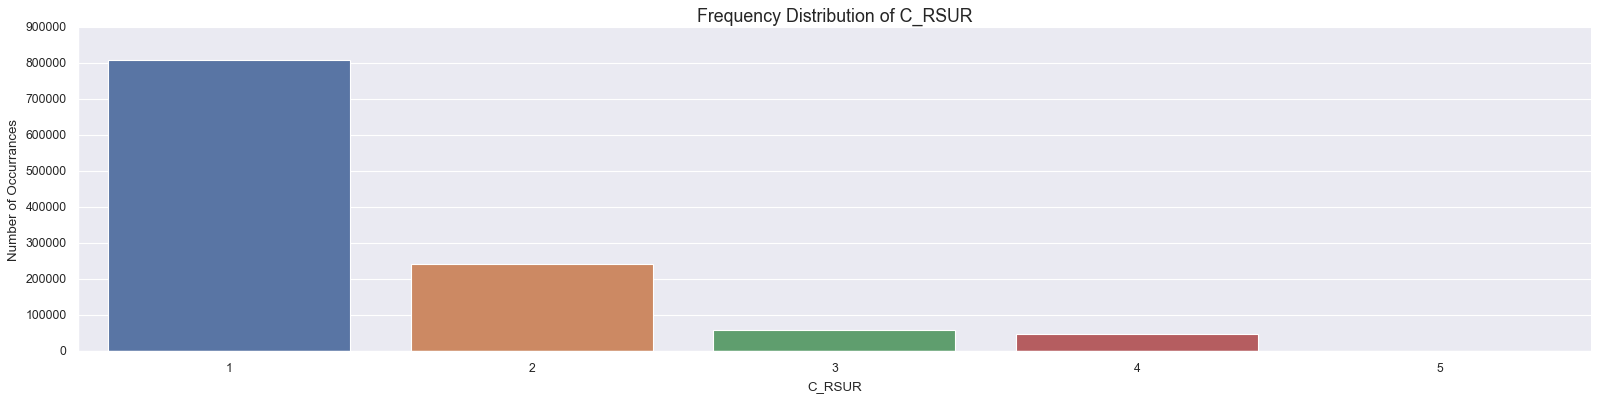

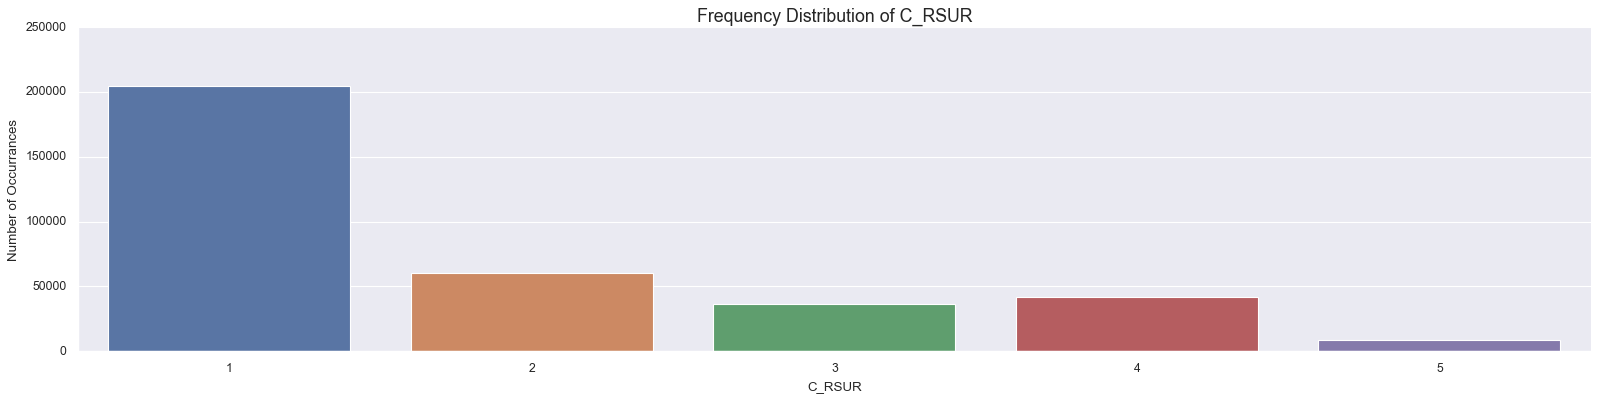

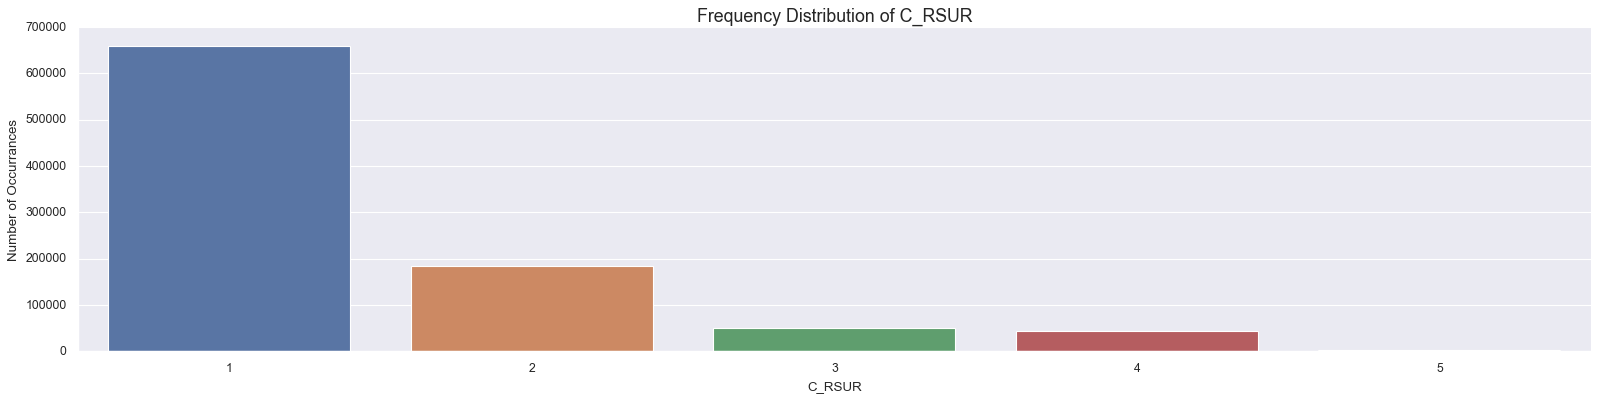

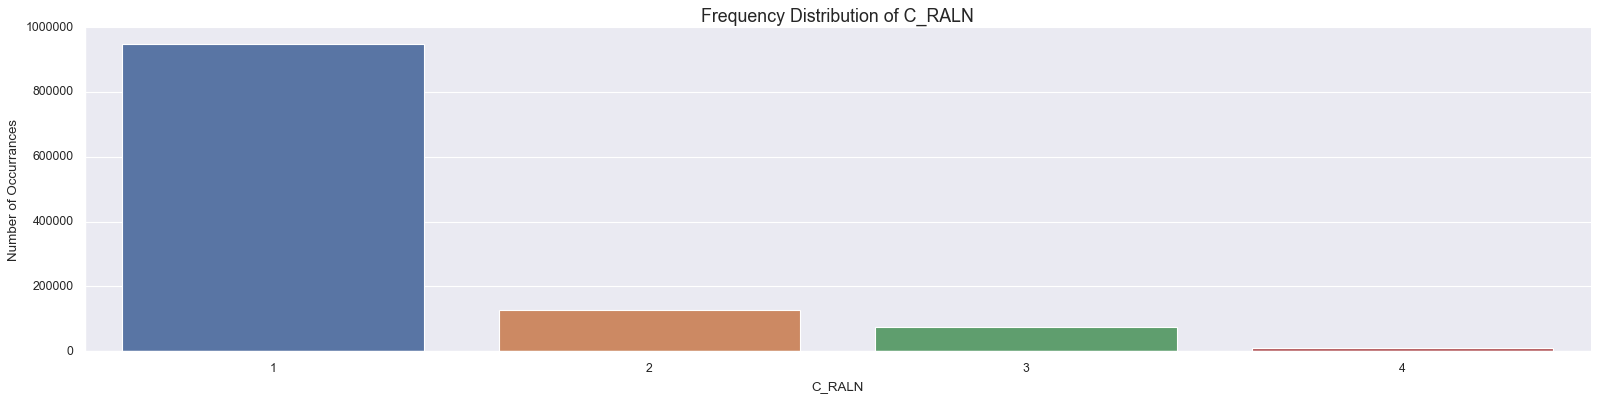

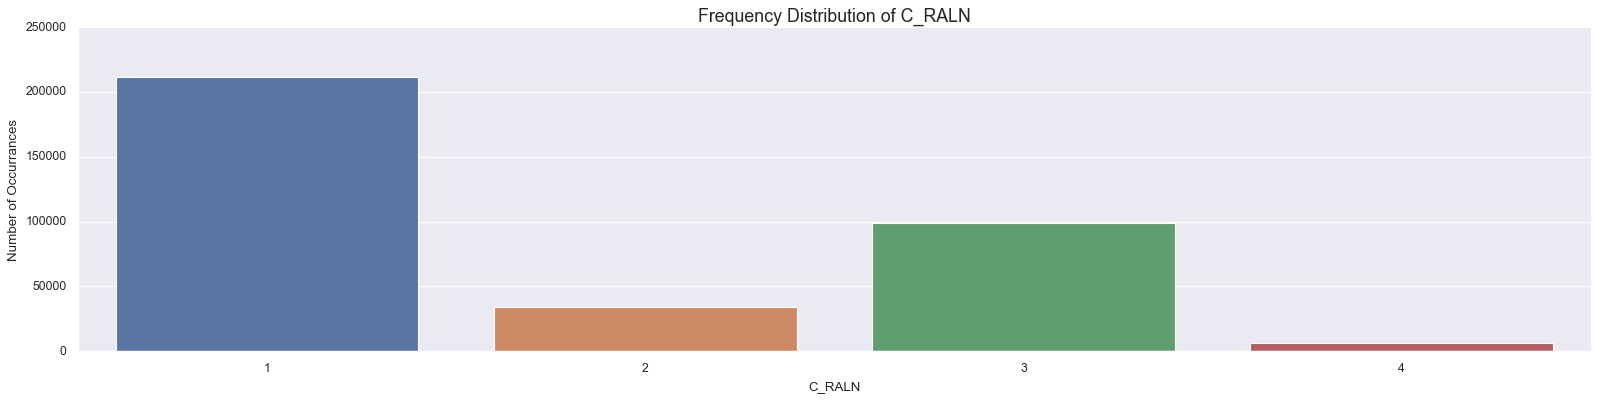

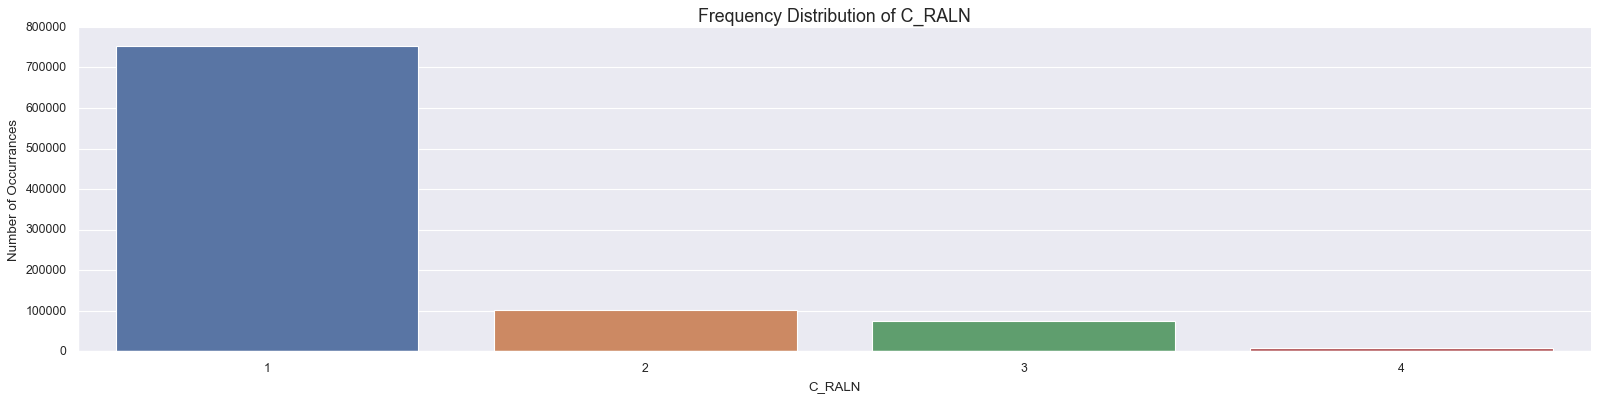

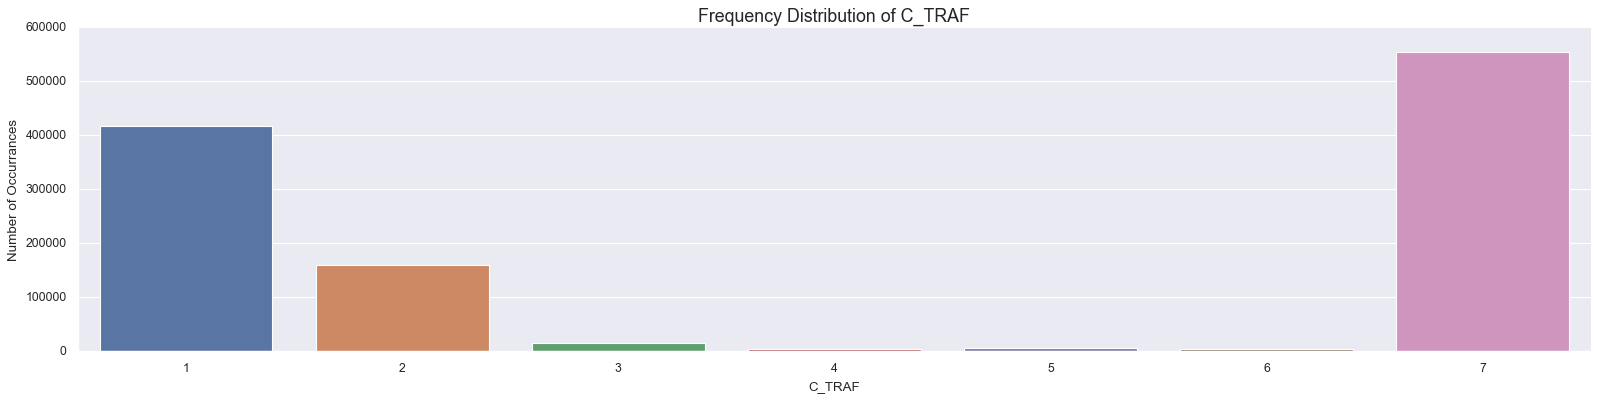

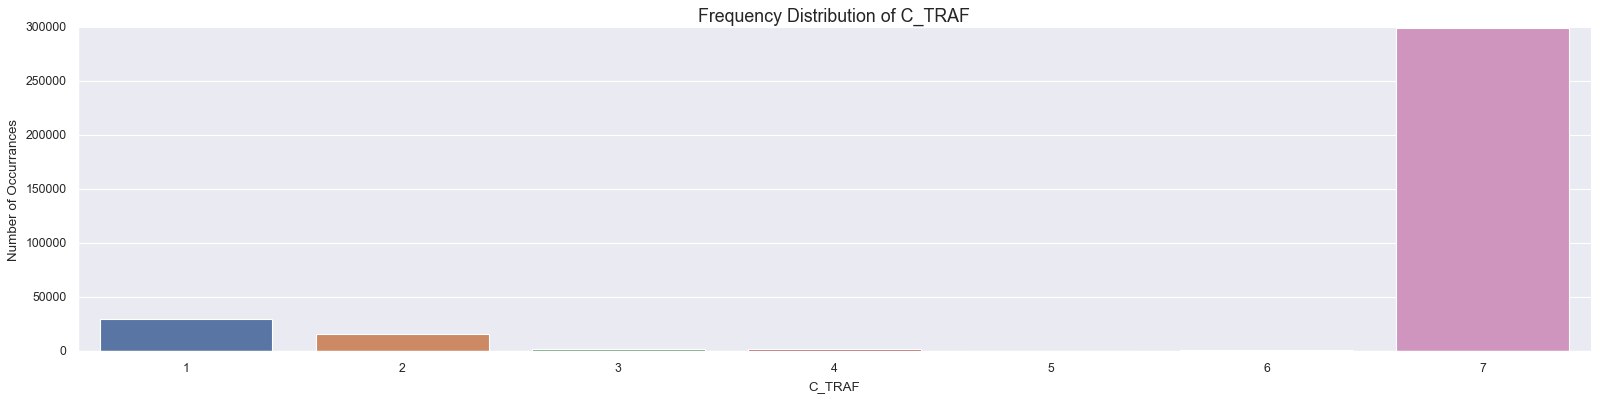

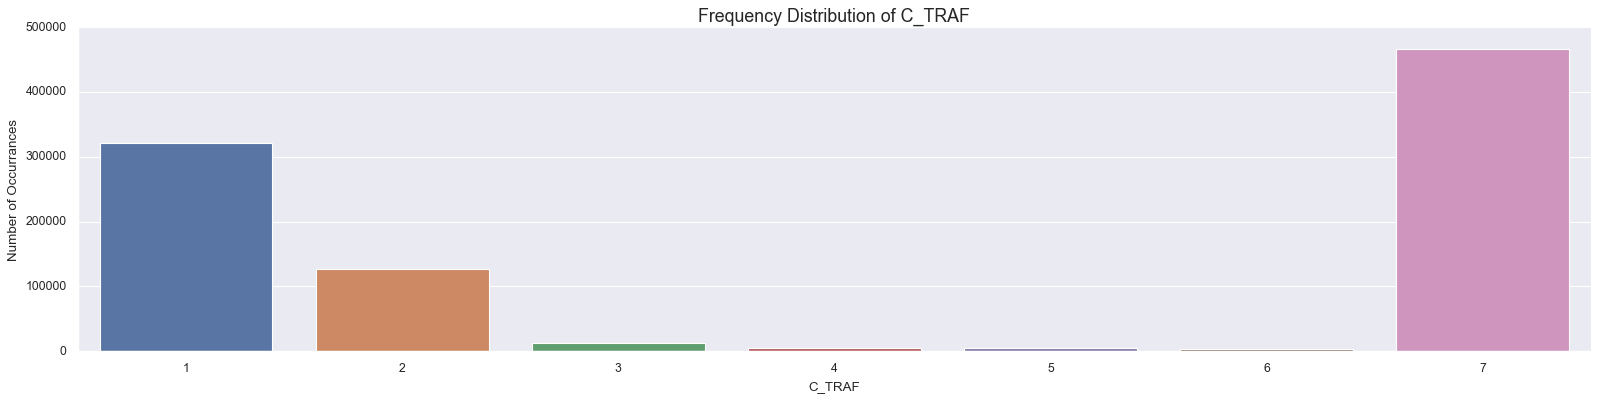

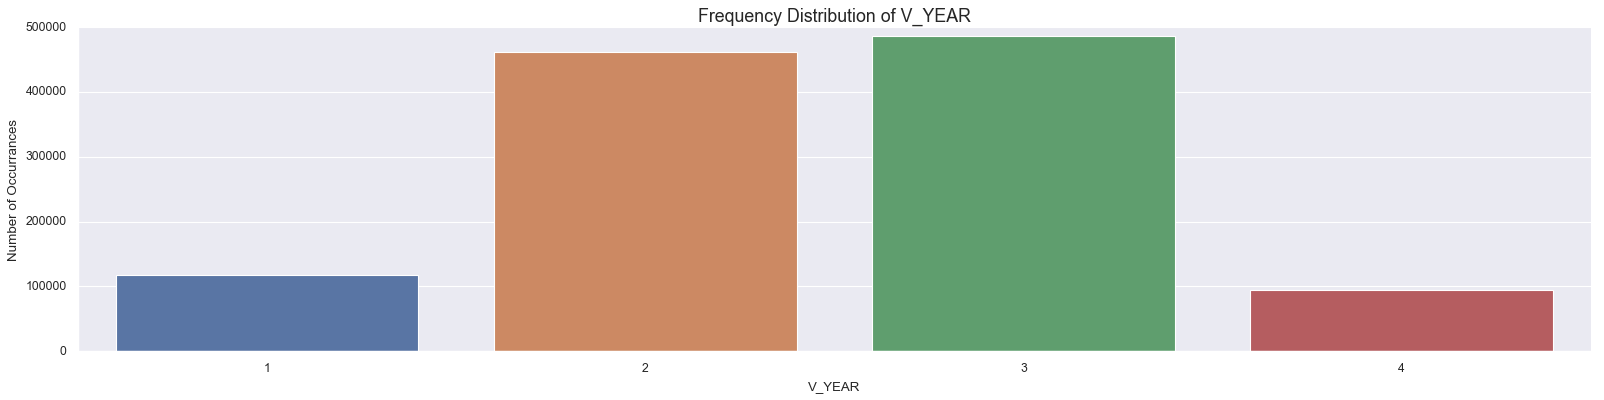

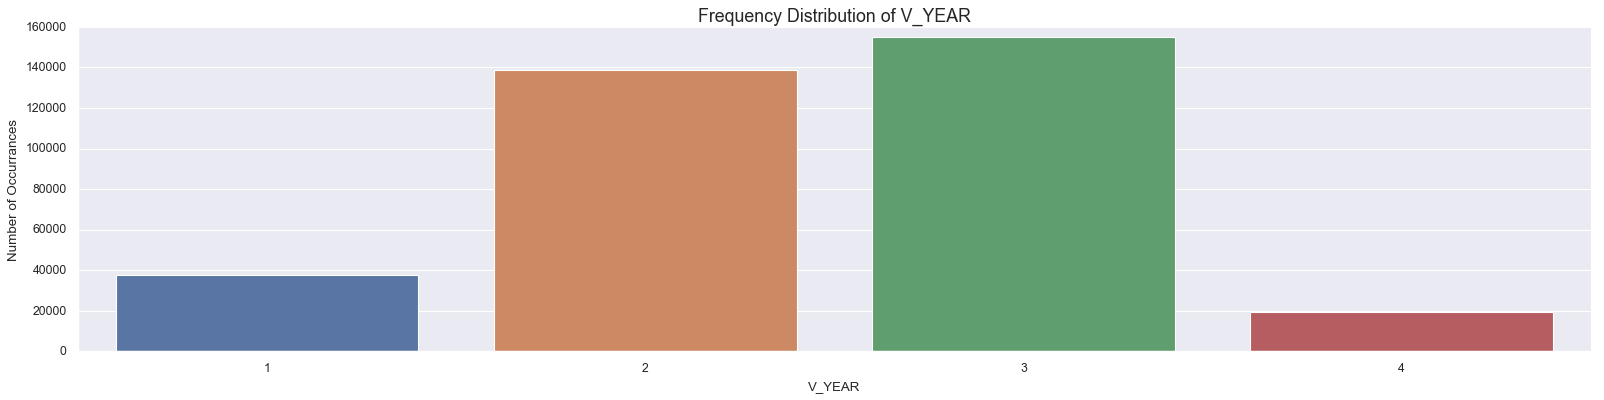

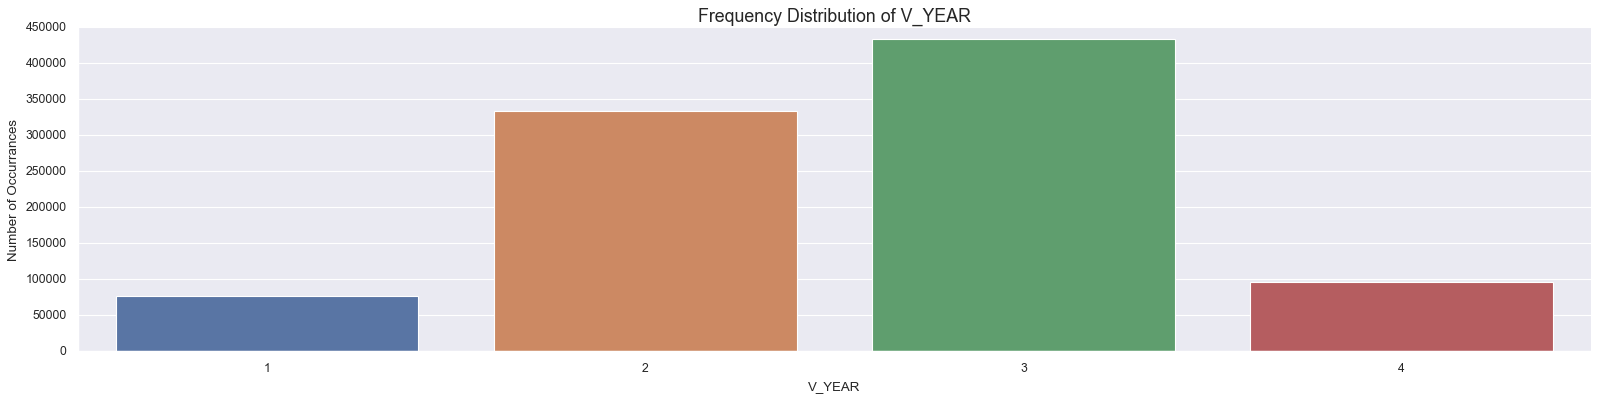

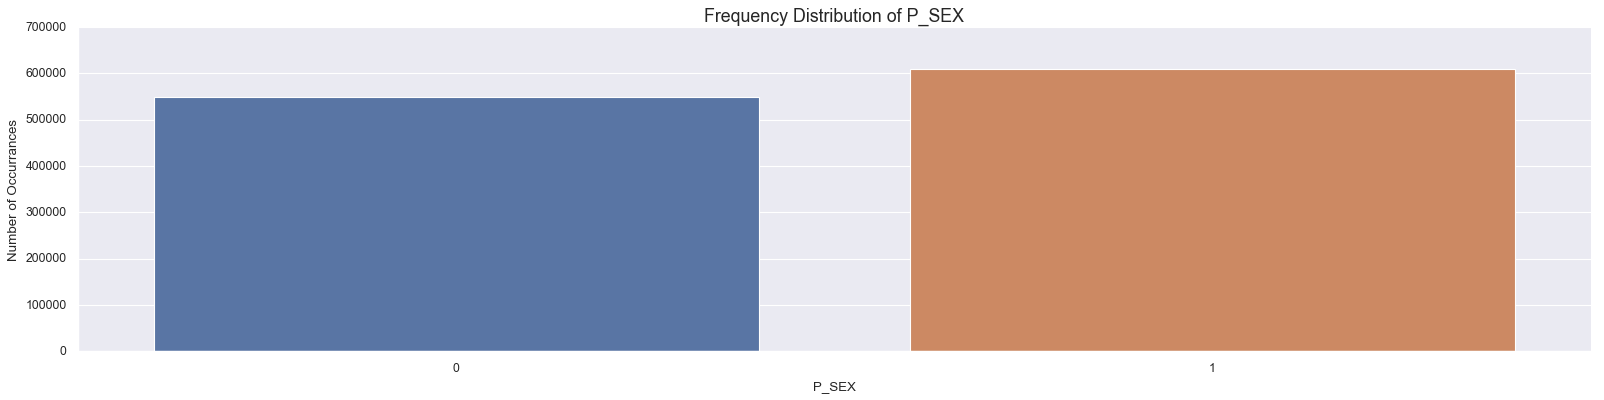

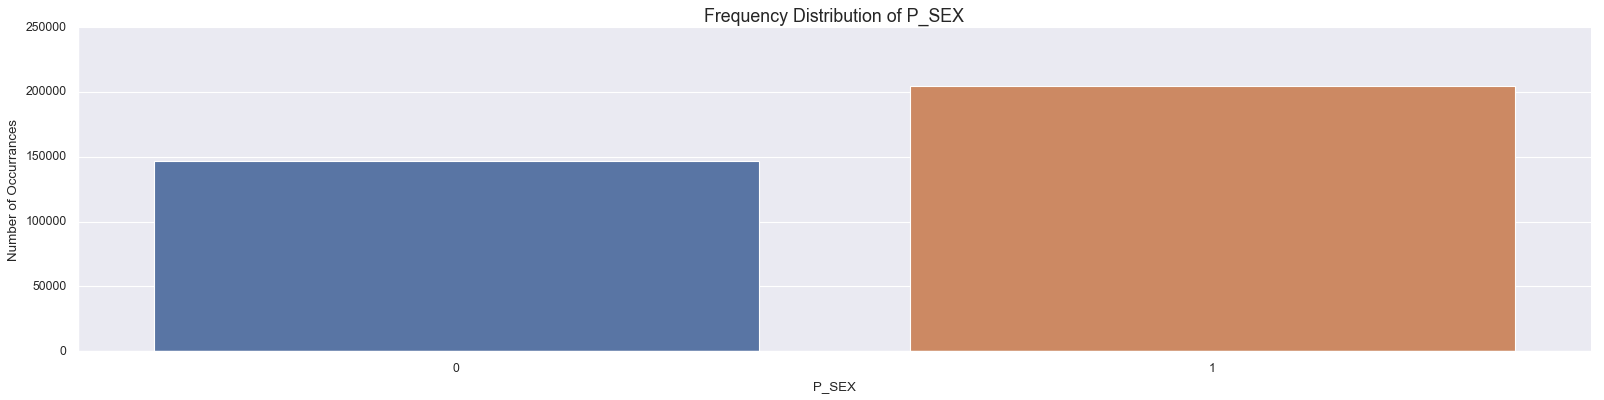

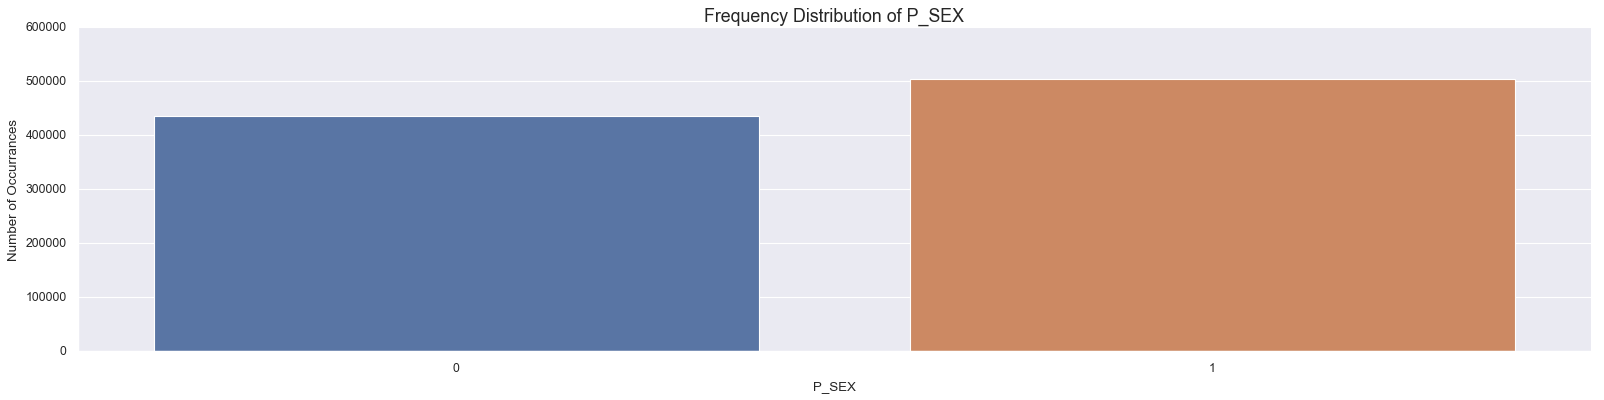

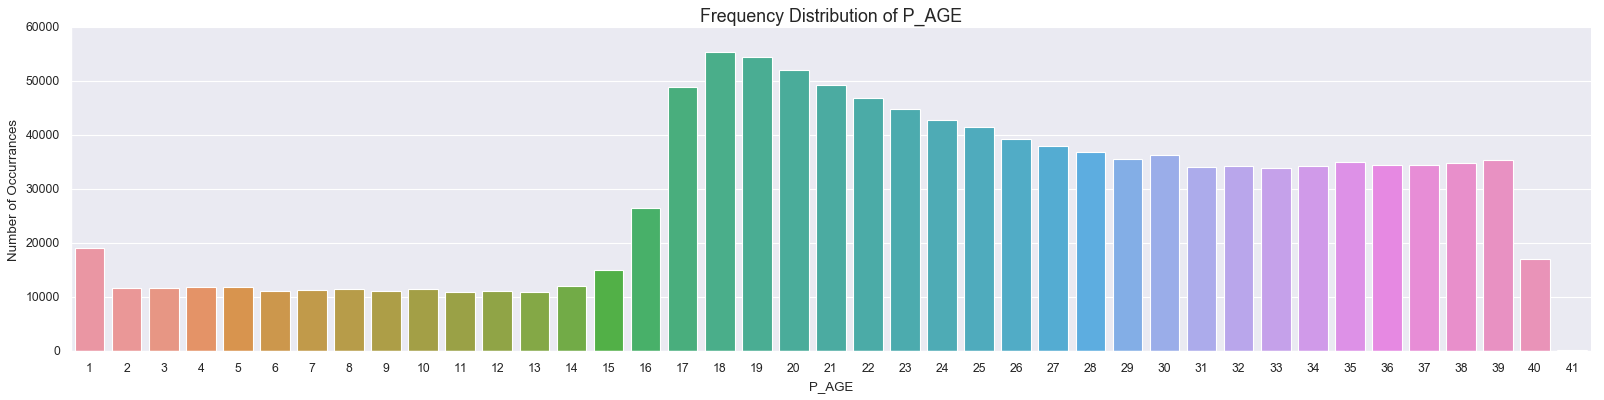

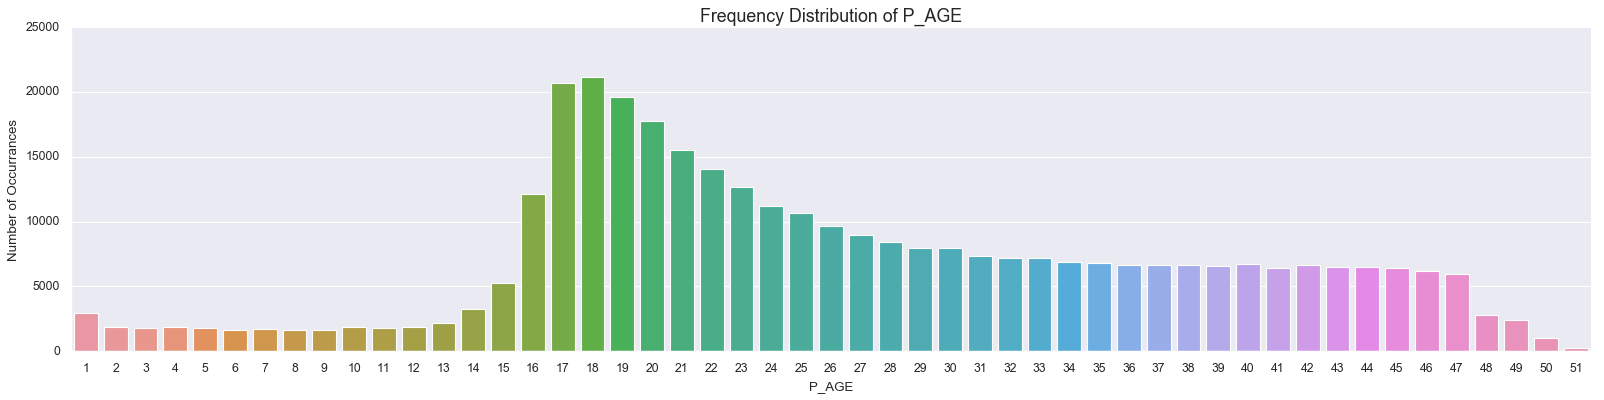

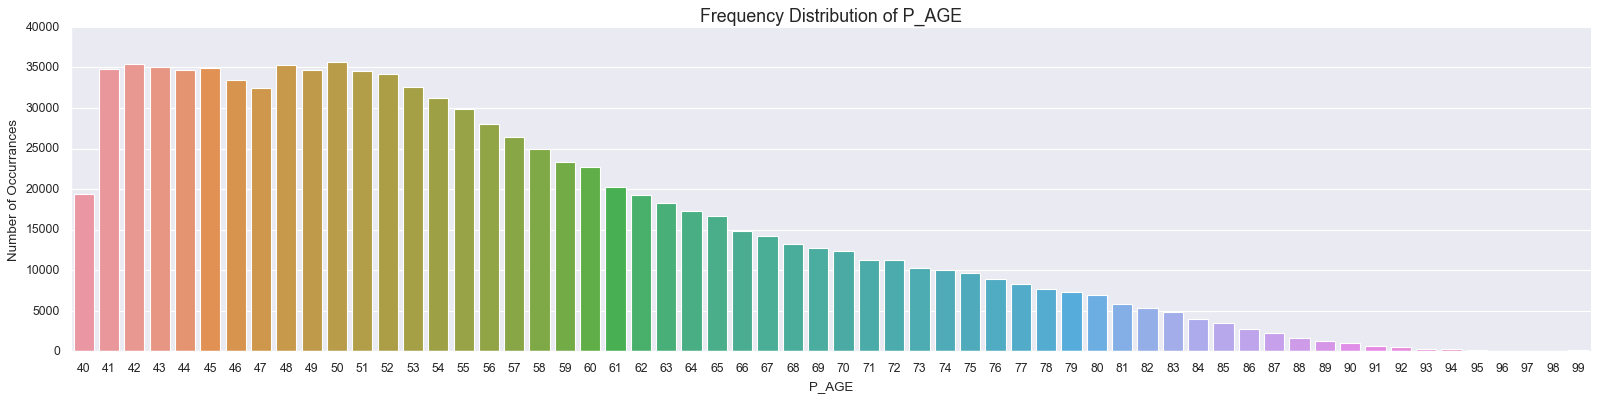

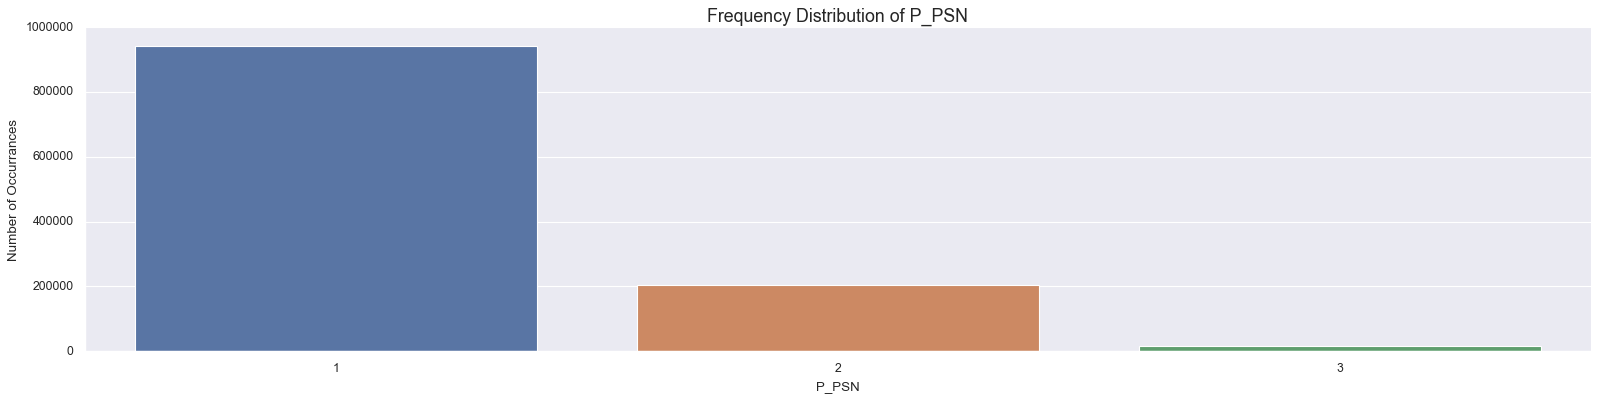

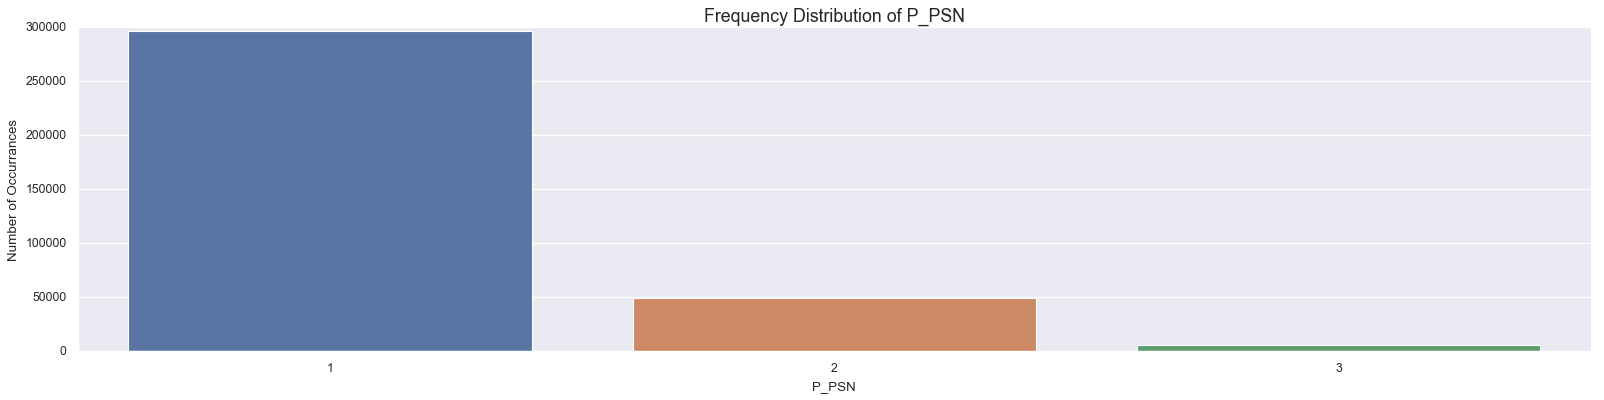

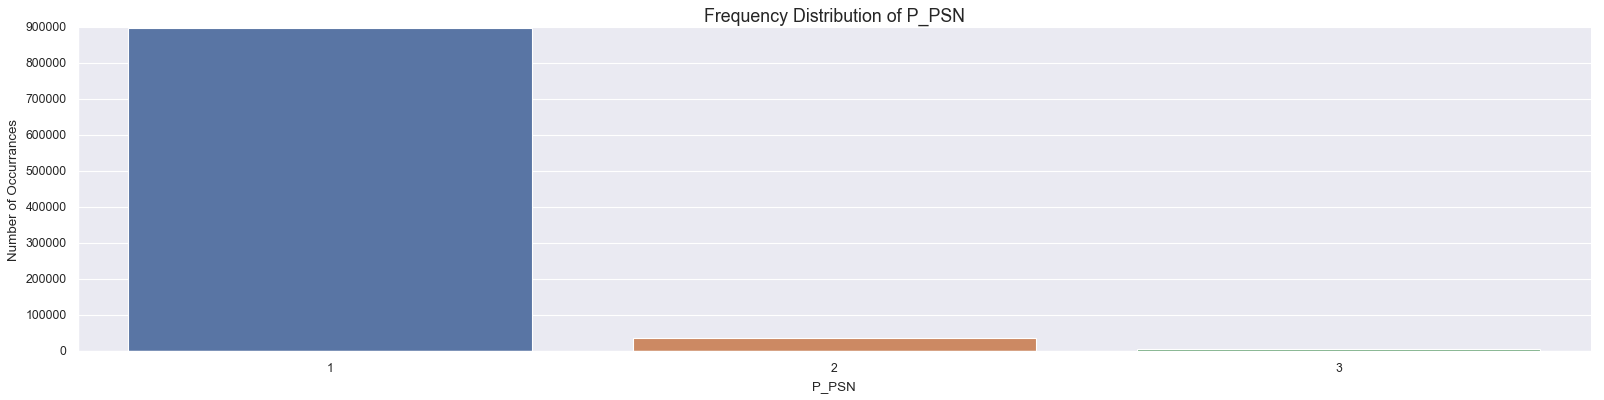

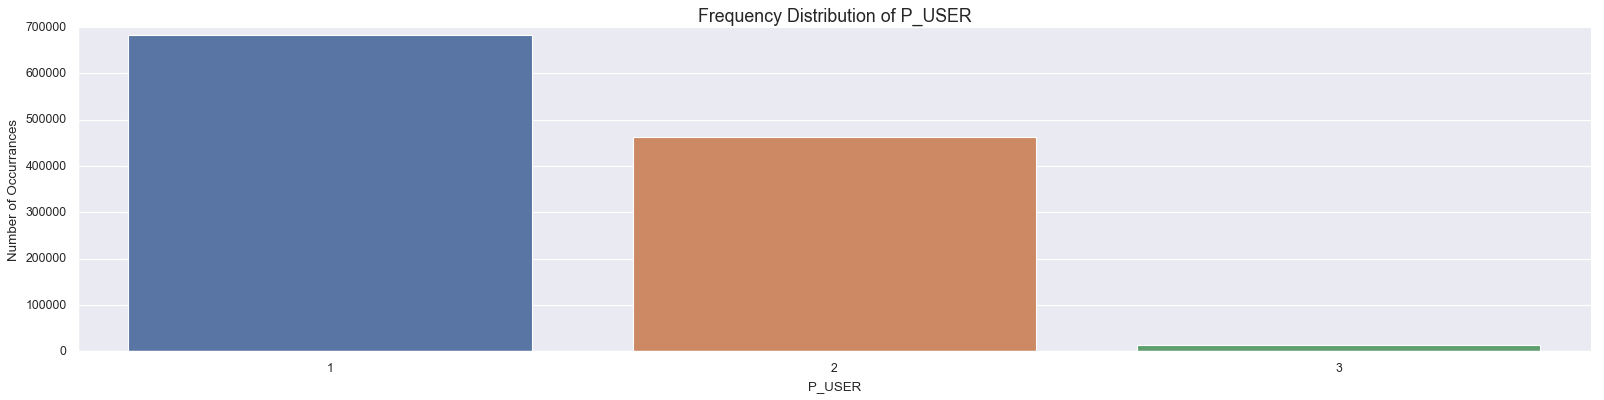

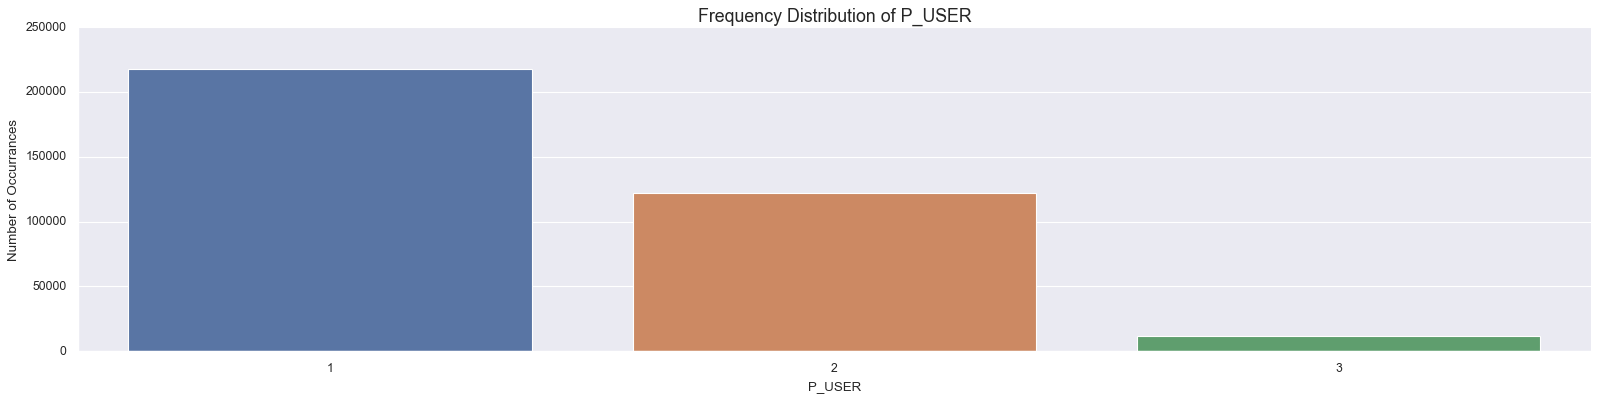

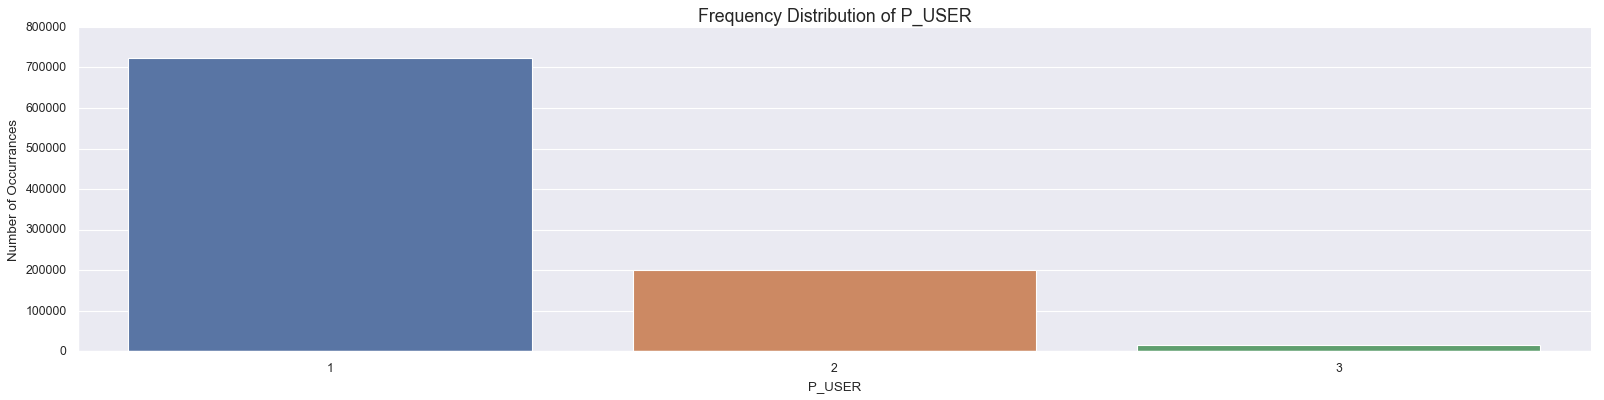

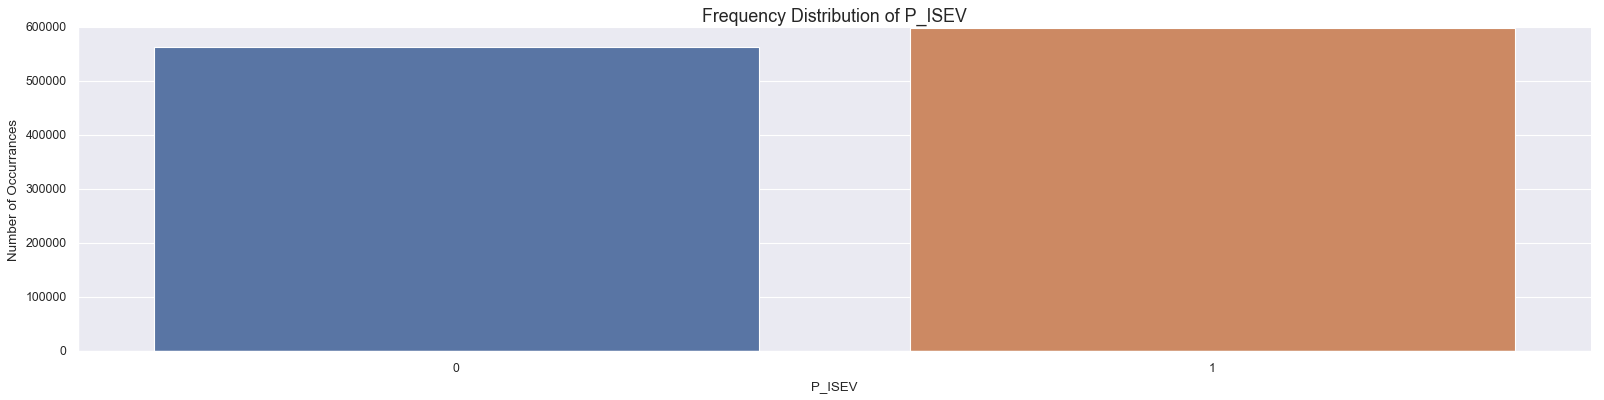

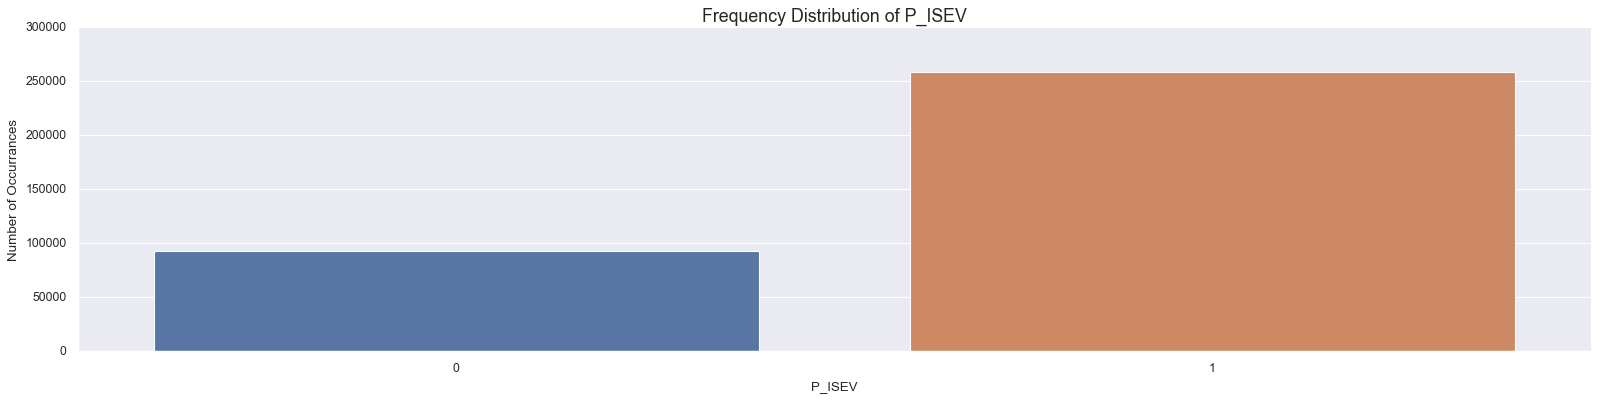

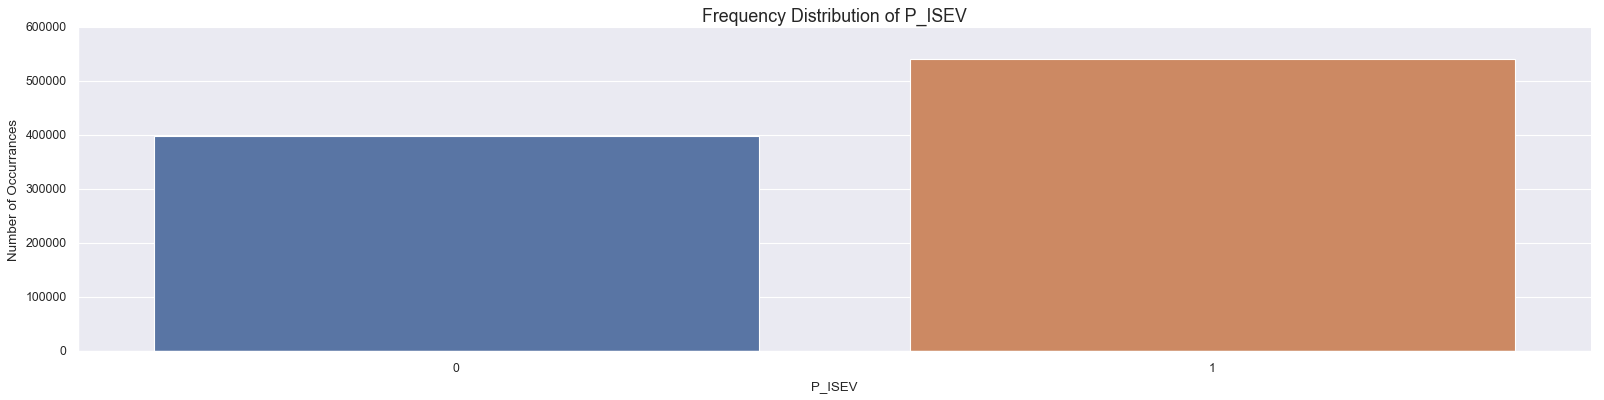

In [50]:
for col in cluster1.columns:
    g = sns.catplot(col, data=cluster1, kind="count", legend = True, height = 5, aspect = 4)
    g.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0}'.format(col), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()
    
    g = sns.catplot(col, data=cluster2, kind="count", legend = True, height = 5, aspect = 4)
    g.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0}'.format(col), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()
    
    g = sns.catplot(col, data=cluster3, kind="count", legend = True, height = 5, aspect = 4)
    g.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0}'.format(col), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()